<a href="https://colab.research.google.com/github/FlorianWoelki/fashion_mnist_gan/blob/master/fashion_mnist_gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [0]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [0]:
x_train = x_train/127.5-1

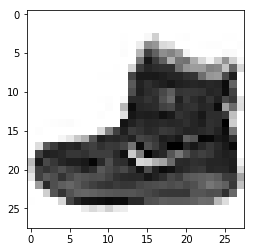

In [50]:
plt.imshow(x_train[0], cmap='Greys')

In [0]:
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU

In [0]:
x_train = np.expand_dims(x_train, axis=3)

In [53]:
def create_generator():
  model = Sequential()

  model.add(Dense(256, input_dim=100))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))
  
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(1024))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(np.prod((28, 28, 1)), activation='tanh'))
  model.add(Reshape((28, 28, 1)))

  model.summary()

  noise = Input(shape=(100,))
  img = model(noise)

  return Model(noise, img)

generator = create_generator()
z = Input(shape=(100,))
img = generator(z)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
dense_23 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 512)               2048      
_________________________________________________________________
dense_24 (Dense)             (None, 1024)             

In [54]:
def create_discriminator():
  model = Sequential()

  model.add(Flatten(input_shape=(28, 28, 1)))
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(Dense(256))
  model.add(LeakyReLU(0.2))
  model.add(Dense(1, activation='sigmoid'))
  model.summary()

  img = Input(shape=(28, 28, 1))
  validity = model(img)

  return Model(img, validity)

discriminator = create_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
discriminator.trainable = False

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
________________________________________________

In [0]:
validity = discriminator(img)
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

In [0]:
def sample_images(epoch):
  r, c = 5, 5
  noise = np.random.normal(0, 1, (r*c, 100))
  gen_imgs = generator.predict(noise)

  # Rescale images 0 - 1
  gen_imgs = 0.5*gen_imgs+0.5

  fig, axs = plt.subplots(r, c)
  cnt = 0
  for i in range(r):
    for j in range(c):
      axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
      axs[i, j].axis('off')
      cnt += 1
  #fig.savefig("images/%d.png" % epoch)
  plt.show()
  plt.close()

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 1.019505, acc.: 25.00%] [G loss: 0.726700]


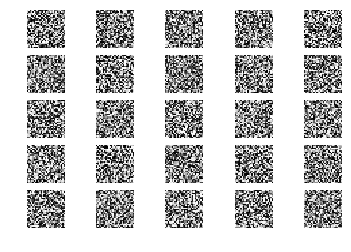

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: 0.574852, acc.: 70.31%] [G loss: 0.725085]
2 [D loss: 0.429500, acc.: 75.00%] [G loss: 0.845236]
3 [D loss: 0.324638, acc.: 89.06%] [G loss: 0.900089]
4 [D loss: 0.290496, acc.: 92.19%] [G loss: 1.053216]
5 [D loss: 0.267247, acc.: 93.75%] [G loss: 1.132003]
6 [D loss: 0.244239, acc.: 100.00%] [G loss: 1.205603]
7 [D loss: 0.189736, acc.: 100.00%] [G loss: 1.309007]
8 [D loss: 0.185696, acc.: 100.00%] [G loss: 1.516414]
9 [D loss: 0.175033, acc.: 100.00%] [G loss: 1.567384]
10 [D loss: 0.192937, acc.: 98.44%] [G loss: 1.566203]
11 [D loss: 0.132364, acc.: 100.00%] [G loss: 1.697942]
12 [D loss: 0.132874, acc.: 98.44%] [G loss: 1.697397]
13 [D loss: 0.137095, acc.: 100.00%] [G loss: 1.926827]
14 [D loss: 0.126925, acc.: 100.00%] [G loss: 1.949391]
15 [D loss: 0.093157, acc.: 100.00%] [G loss: 2.008397]
16 [D loss: 0.096878, acc.: 100.00%] [G loss: 2.060728]
17 [D loss: 0.096806, acc.: 100.00%] [G loss: 2.061486]
18 [D loss: 0.088584, acc.: 100.00%] [G loss: 2.164671]
19 [D lo

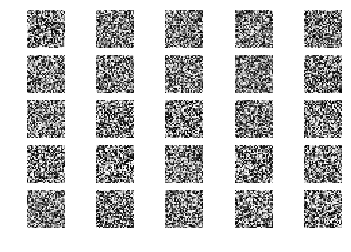

51 [D loss: 0.026837, acc.: 100.00%] [G loss: 3.497455]
52 [D loss: 0.028943, acc.: 100.00%] [G loss: 3.407059]
53 [D loss: 0.023725, acc.: 100.00%] [G loss: 3.449337]
54 [D loss: 0.031458, acc.: 100.00%] [G loss: 3.449233]
55 [D loss: 0.025601, acc.: 100.00%] [G loss: 3.526876]
56 [D loss: 0.025068, acc.: 100.00%] [G loss: 3.575523]
57 [D loss: 0.026386, acc.: 100.00%] [G loss: 3.557081]
58 [D loss: 0.020438, acc.: 100.00%] [G loss: 3.683383]
59 [D loss: 0.030007, acc.: 100.00%] [G loss: 3.747105]
60 [D loss: 0.030666, acc.: 100.00%] [G loss: 3.729136]
61 [D loss: 0.027309, acc.: 100.00%] [G loss: 3.640674]
62 [D loss: 0.022908, acc.: 100.00%] [G loss: 3.620937]
63 [D loss: 0.021375, acc.: 100.00%] [G loss: 3.675660]
64 [D loss: 0.016278, acc.: 100.00%] [G loss: 3.756391]
65 [D loss: 0.025872, acc.: 100.00%] [G loss: 3.799039]
66 [D loss: 0.015805, acc.: 100.00%] [G loss: 3.796919]
67 [D loss: 0.015331, acc.: 100.00%] [G loss: 3.815588]
68 [D loss: 0.018818, acc.: 100.00%] [G loss: 3.

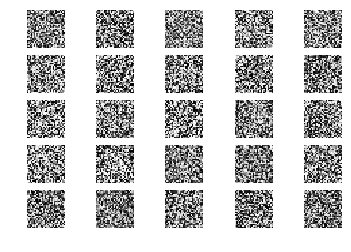

101 [D loss: 0.019616, acc.: 100.00%] [G loss: 4.326159]
102 [D loss: 0.018547, acc.: 100.00%] [G loss: 4.292888]
103 [D loss: 0.020327, acc.: 100.00%] [G loss: 4.300993]
104 [D loss: 0.037797, acc.: 98.44%] [G loss: 4.309599]
105 [D loss: 0.028992, acc.: 100.00%] [G loss: 4.315318]
106 [D loss: 0.028100, acc.: 100.00%] [G loss: 4.395566]
107 [D loss: 0.016211, acc.: 100.00%] [G loss: 4.172729]
108 [D loss: 0.010620, acc.: 100.00%] [G loss: 4.248754]
109 [D loss: 0.015642, acc.: 100.00%] [G loss: 4.213418]
110 [D loss: 0.020177, acc.: 100.00%] [G loss: 4.206361]
111 [D loss: 0.014413, acc.: 100.00%] [G loss: 4.251904]
112 [D loss: 0.014447, acc.: 100.00%] [G loss: 4.422623]
113 [D loss: 0.013693, acc.: 100.00%] [G loss: 4.322778]
114 [D loss: 0.016897, acc.: 100.00%] [G loss: 4.245636]
115 [D loss: 0.022695, acc.: 100.00%] [G loss: 4.420578]
116 [D loss: 0.013344, acc.: 100.00%] [G loss: 4.395506]
117 [D loss: 0.016321, acc.: 100.00%] [G loss: 4.549291]
118 [D loss: 0.012369, acc.: 100

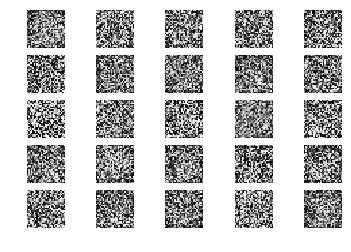

151 [D loss: 0.014925, acc.: 100.00%] [G loss: 4.933417]
152 [D loss: 0.059754, acc.: 98.44%] [G loss: 4.431017]
153 [D loss: 0.016347, acc.: 100.00%] [G loss: 4.506126]
154 [D loss: 0.021228, acc.: 100.00%] [G loss: 4.437854]
155 [D loss: 0.027653, acc.: 100.00%] [G loss: 4.478623]
156 [D loss: 0.031815, acc.: 100.00%] [G loss: 4.776996]
157 [D loss: 0.019773, acc.: 100.00%] [G loss: 5.133489]
158 [D loss: 0.023216, acc.: 100.00%] [G loss: 4.872465]
159 [D loss: 0.026115, acc.: 100.00%] [G loss: 4.906013]
160 [D loss: 0.016471, acc.: 100.00%] [G loss: 4.936390]
161 [D loss: 0.032424, acc.: 100.00%] [G loss: 4.797453]
162 [D loss: 0.029163, acc.: 100.00%] [G loss: 4.950556]
163 [D loss: 0.045075, acc.: 98.44%] [G loss: 4.679327]
164 [D loss: 0.030744, acc.: 100.00%] [G loss: 4.608128]
165 [D loss: 0.022065, acc.: 100.00%] [G loss: 4.928738]
166 [D loss: 0.016718, acc.: 100.00%] [G loss: 4.676605]
167 [D loss: 0.071845, acc.: 98.44%] [G loss: 4.187383]
168 [D loss: 0.025707, acc.: 100.0

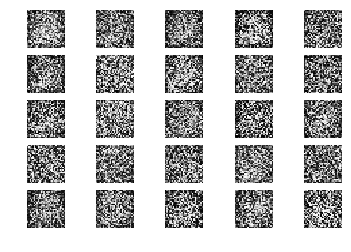

201 [D loss: 0.079397, acc.: 98.44%] [G loss: 4.069336]
202 [D loss: 0.189126, acc.: 87.50%] [G loss: 4.114719]
203 [D loss: 0.031554, acc.: 100.00%] [G loss: 4.370191]
204 [D loss: 0.073437, acc.: 98.44%] [G loss: 5.089823]
205 [D loss: 0.135703, acc.: 96.88%] [G loss: 4.623692]
206 [D loss: 0.047470, acc.: 98.44%] [G loss: 4.542466]
207 [D loss: 0.101508, acc.: 96.88%] [G loss: 4.125197]
208 [D loss: 0.122499, acc.: 95.31%] [G loss: 3.837453]
209 [D loss: 0.134393, acc.: 95.31%] [G loss: 4.060445]
210 [D loss: 0.258064, acc.: 90.62%] [G loss: 3.494868]
211 [D loss: 0.247978, acc.: 89.06%] [G loss: 3.306026]
212 [D loss: 0.087587, acc.: 98.44%] [G loss: 4.541340]
213 [D loss: 0.117516, acc.: 98.44%] [G loss: 4.379292]
214 [D loss: 0.078851, acc.: 96.88%] [G loss: 4.526605]
215 [D loss: 0.132977, acc.: 95.31%] [G loss: 4.739635]
216 [D loss: 0.208323, acc.: 96.88%] [G loss: 4.372346]
217 [D loss: 0.134373, acc.: 96.88%] [G loss: 3.653940]
218 [D loss: 0.095084, acc.: 93.75%] [G loss: 4

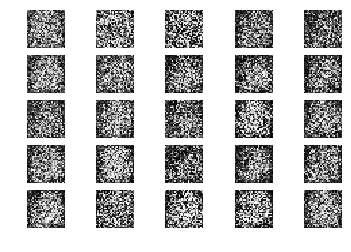

251 [D loss: 0.141639, acc.: 93.75%] [G loss: 3.935934]
252 [D loss: 0.184697, acc.: 89.06%] [G loss: 3.989354]
253 [D loss: 0.101052, acc.: 96.88%] [G loss: 3.741476]
254 [D loss: 0.159277, acc.: 93.75%] [G loss: 3.726119]
255 [D loss: 0.070190, acc.: 98.44%] [G loss: 4.269226]
256 [D loss: 0.307167, acc.: 89.06%] [G loss: 3.348630]
257 [D loss: 0.551743, acc.: 73.44%] [G loss: 2.652941]
258 [D loss: 0.173063, acc.: 90.62%] [G loss: 4.558925]
259 [D loss: 0.220112, acc.: 90.62%] [G loss: 3.903646]
260 [D loss: 0.115655, acc.: 96.88%] [G loss: 3.731260]
261 [D loss: 0.182871, acc.: 92.19%] [G loss: 3.260615]
262 [D loss: 0.149981, acc.: 96.88%] [G loss: 3.334328]
263 [D loss: 0.149156, acc.: 93.75%] [G loss: 3.723345]
264 [D loss: 0.355447, acc.: 87.50%] [G loss: 3.513519]
265 [D loss: 0.206179, acc.: 98.44%] [G loss: 4.002809]
266 [D loss: 0.506154, acc.: 81.25%] [G loss: 3.271617]
267 [D loss: 0.238188, acc.: 92.19%] [G loss: 2.847116]
268 [D loss: 0.124233, acc.: 96.88%] [G loss: 3.

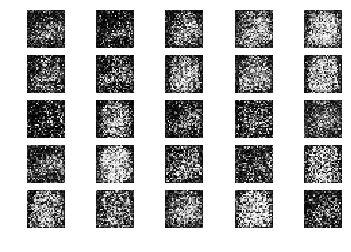

301 [D loss: 0.355524, acc.: 79.69%] [G loss: 3.351007]
302 [D loss: 0.503007, acc.: 75.00%] [G loss: 2.137232]
303 [D loss: 0.251078, acc.: 92.19%] [G loss: 3.554924]
304 [D loss: 0.448074, acc.: 79.69%] [G loss: 3.043809]
305 [D loss: 0.395831, acc.: 79.69%] [G loss: 2.355145]
306 [D loss: 0.302927, acc.: 84.38%] [G loss: 2.611250]
307 [D loss: 0.238618, acc.: 93.75%] [G loss: 2.720258]
308 [D loss: 0.341629, acc.: 87.50%] [G loss: 3.195317]
309 [D loss: 0.399495, acc.: 79.69%] [G loss: 2.927291]
310 [D loss: 0.448910, acc.: 85.94%] [G loss: 2.487419]
311 [D loss: 0.388372, acc.: 84.38%] [G loss: 2.333752]
312 [D loss: 0.303702, acc.: 85.94%] [G loss: 1.989394]
313 [D loss: 0.244872, acc.: 85.94%] [G loss: 2.715012]
314 [D loss: 0.498595, acc.: 73.44%] [G loss: 2.016027]
315 [D loss: 0.454805, acc.: 85.94%] [G loss: 2.970938]
316 [D loss: 0.683922, acc.: 67.19%] [G loss: 2.174547]
317 [D loss: 0.354758, acc.: 84.38%] [G loss: 2.467378]
318 [D loss: 0.336559, acc.: 84.38%] [G loss: 2.

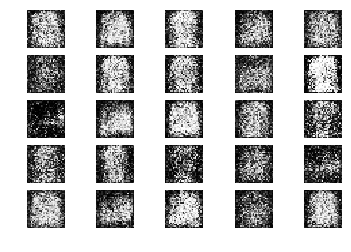

351 [D loss: 0.567744, acc.: 73.44%] [G loss: 1.822478]
352 [D loss: 0.705355, acc.: 71.88%] [G loss: 1.969839]
353 [D loss: 0.524874, acc.: 73.44%] [G loss: 2.013677]
354 [D loss: 0.489432, acc.: 76.56%] [G loss: 2.241969]
355 [D loss: 0.733768, acc.: 57.81%] [G loss: 1.584835]
356 [D loss: 0.546508, acc.: 76.56%] [G loss: 1.640507]
357 [D loss: 0.388630, acc.: 78.12%] [G loss: 2.297492]
358 [D loss: 0.826779, acc.: 68.75%] [G loss: 1.663785]
359 [D loss: 0.520421, acc.: 75.00%] [G loss: 1.766913]
360 [D loss: 0.460597, acc.: 82.81%] [G loss: 1.959224]
361 [D loss: 0.463504, acc.: 79.69%] [G loss: 1.892594]
362 [D loss: 0.563803, acc.: 76.56%] [G loss: 1.530782]
363 [D loss: 0.559402, acc.: 73.44%] [G loss: 1.652796]
364 [D loss: 0.630208, acc.: 71.88%] [G loss: 1.762634]
365 [D loss: 0.446694, acc.: 81.25%] [G loss: 1.893200]
366 [D loss: 0.717333, acc.: 60.94%] [G loss: 1.971896]
367 [D loss: 0.653646, acc.: 68.75%] [G loss: 1.680554]
368 [D loss: 0.575536, acc.: 67.19%] [G loss: 1.

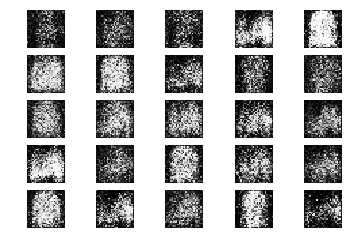

401 [D loss: 0.668326, acc.: 65.62%] [G loss: 1.475494]
402 [D loss: 0.662509, acc.: 65.62%] [G loss: 1.253856]
403 [D loss: 0.678475, acc.: 62.50%] [G loss: 1.293699]
404 [D loss: 0.650737, acc.: 71.88%] [G loss: 1.271808]
405 [D loss: 0.770834, acc.: 48.44%] [G loss: 1.191286]
406 [D loss: 0.660001, acc.: 64.06%] [G loss: 1.155893]
407 [D loss: 0.663912, acc.: 73.44%] [G loss: 1.139217]
408 [D loss: 0.652812, acc.: 60.94%] [G loss: 1.280842]
409 [D loss: 0.727414, acc.: 59.38%] [G loss: 1.257333]
410 [D loss: 0.589073, acc.: 71.88%] [G loss: 1.354489]
411 [D loss: 0.715469, acc.: 56.25%] [G loss: 1.208187]
412 [D loss: 0.545176, acc.: 76.56%] [G loss: 1.323436]
413 [D loss: 0.561703, acc.: 75.00%] [G loss: 1.338263]
414 [D loss: 0.523782, acc.: 78.12%] [G loss: 1.299734]
415 [D loss: 0.600172, acc.: 65.62%] [G loss: 1.304816]
416 [D loss: 0.583973, acc.: 75.00%] [G loss: 1.383273]
417 [D loss: 0.534672, acc.: 75.00%] [G loss: 1.372344]
418 [D loss: 0.573279, acc.: 76.56%] [G loss: 1.

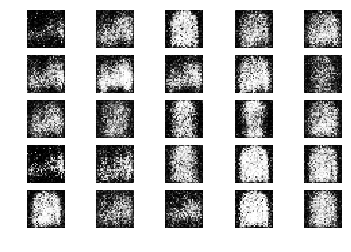

451 [D loss: 0.619169, acc.: 70.31%] [G loss: 1.195192]
452 [D loss: 0.645920, acc.: 64.06%] [G loss: 1.129899]
453 [D loss: 0.596213, acc.: 62.50%] [G loss: 1.248041]
454 [D loss: 0.572772, acc.: 78.12%] [G loss: 1.162197]
455 [D loss: 0.498051, acc.: 78.12%] [G loss: 1.266690]
456 [D loss: 0.572017, acc.: 75.00%] [G loss: 1.215903]
457 [D loss: 0.618525, acc.: 64.06%] [G loss: 1.091784]
458 [D loss: 0.532372, acc.: 70.31%] [G loss: 1.091645]
459 [D loss: 0.603214, acc.: 68.75%] [G loss: 1.071667]
460 [D loss: 0.469085, acc.: 81.25%] [G loss: 1.175655]
461 [D loss: 0.521971, acc.: 71.88%] [G loss: 1.310297]
462 [D loss: 0.581427, acc.: 70.31%] [G loss: 1.219728]
463 [D loss: 0.536386, acc.: 78.12%] [G loss: 1.192674]
464 [D loss: 0.604255, acc.: 67.19%] [G loss: 1.180533]
465 [D loss: 0.644277, acc.: 71.88%] [G loss: 1.180900]
466 [D loss: 0.600391, acc.: 70.31%] [G loss: 1.108580]
467 [D loss: 0.561828, acc.: 73.44%] [G loss: 0.995643]
468 [D loss: 0.563486, acc.: 73.44%] [G loss: 1.

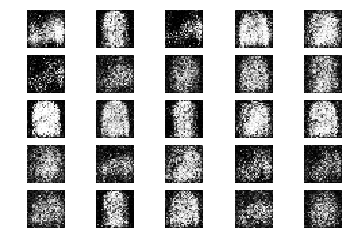

501 [D loss: 0.533702, acc.: 67.19%] [G loss: 1.137301]
502 [D loss: 0.658275, acc.: 60.94%] [G loss: 1.160431]
503 [D loss: 0.687445, acc.: 65.62%] [G loss: 1.099076]
504 [D loss: 0.729182, acc.: 54.69%] [G loss: 0.989902]
505 [D loss: 0.600326, acc.: 62.50%] [G loss: 1.025022]
506 [D loss: 0.607088, acc.: 71.88%] [G loss: 1.012036]
507 [D loss: 0.572537, acc.: 73.44%] [G loss: 0.998232]
508 [D loss: 0.699894, acc.: 56.25%] [G loss: 1.079303]
509 [D loss: 0.634873, acc.: 59.38%] [G loss: 1.133128]
510 [D loss: 0.502879, acc.: 79.69%] [G loss: 1.146548]
511 [D loss: 0.564716, acc.: 62.50%] [G loss: 1.196224]
512 [D loss: 0.611660, acc.: 68.75%] [G loss: 1.170635]
513 [D loss: 0.633076, acc.: 70.31%] [G loss: 1.072402]
514 [D loss: 0.598159, acc.: 71.88%] [G loss: 1.048047]
515 [D loss: 0.540517, acc.: 78.12%] [G loss: 1.093889]
516 [D loss: 0.667207, acc.: 56.25%] [G loss: 1.170360]
517 [D loss: 0.581878, acc.: 70.31%] [G loss: 1.182113]
518 [D loss: 0.581270, acc.: 64.06%] [G loss: 1.

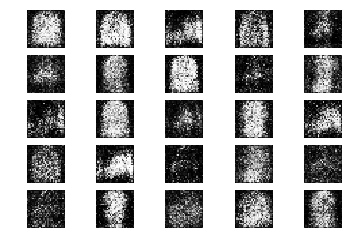

551 [D loss: 0.615829, acc.: 67.19%] [G loss: 0.972633]
552 [D loss: 0.606582, acc.: 73.44%] [G loss: 1.083179]
553 [D loss: 0.522825, acc.: 73.44%] [G loss: 1.035695]
554 [D loss: 0.605945, acc.: 68.75%] [G loss: 1.034195]
555 [D loss: 0.683306, acc.: 62.50%] [G loss: 1.106004]
556 [D loss: 0.580946, acc.: 70.31%] [G loss: 0.966437]
557 [D loss: 0.554159, acc.: 73.44%] [G loss: 1.091733]
558 [D loss: 0.568276, acc.: 70.31%] [G loss: 1.103425]
559 [D loss: 0.606499, acc.: 62.50%] [G loss: 1.119365]
560 [D loss: 0.667726, acc.: 59.38%] [G loss: 0.960623]
561 [D loss: 0.491586, acc.: 82.81%] [G loss: 1.095444]
562 [D loss: 0.614783, acc.: 65.62%] [G loss: 1.089145]
563 [D loss: 0.595462, acc.: 71.88%] [G loss: 1.051592]
564 [D loss: 0.602793, acc.: 62.50%] [G loss: 1.080196]
565 [D loss: 0.544400, acc.: 78.12%] [G loss: 1.079505]
566 [D loss: 0.610169, acc.: 67.19%] [G loss: 1.091487]
567 [D loss: 0.588126, acc.: 65.62%] [G loss: 1.027815]
568 [D loss: 0.546919, acc.: 71.88%] [G loss: 1.

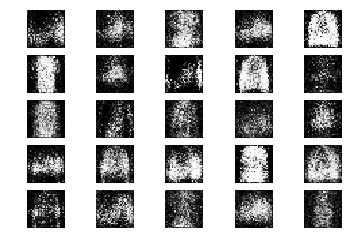

601 [D loss: 0.704757, acc.: 59.38%] [G loss: 1.011850]
602 [D loss: 0.559530, acc.: 75.00%] [G loss: 1.048274]
603 [D loss: 0.591905, acc.: 62.50%] [G loss: 1.039599]
604 [D loss: 0.578631, acc.: 78.12%] [G loss: 1.076522]
605 [D loss: 0.527824, acc.: 76.56%] [G loss: 1.075584]
606 [D loss: 0.612395, acc.: 67.19%] [G loss: 1.010033]
607 [D loss: 0.577771, acc.: 71.88%] [G loss: 1.080751]
608 [D loss: 0.515144, acc.: 76.56%] [G loss: 0.910406]
609 [D loss: 0.633016, acc.: 62.50%] [G loss: 1.076561]
610 [D loss: 0.573824, acc.: 70.31%] [G loss: 1.125070]
611 [D loss: 0.626588, acc.: 62.50%] [G loss: 1.114105]
612 [D loss: 0.603550, acc.: 65.62%] [G loss: 1.122682]
613 [D loss: 0.544350, acc.: 75.00%] [G loss: 1.029131]
614 [D loss: 0.565490, acc.: 71.88%] [G loss: 1.266718]
615 [D loss: 0.544913, acc.: 73.44%] [G loss: 1.188721]
616 [D loss: 0.597578, acc.: 73.44%] [G loss: 1.087916]
617 [D loss: 0.752816, acc.: 62.50%] [G loss: 0.961243]
618 [D loss: 0.527563, acc.: 79.69%] [G loss: 1.

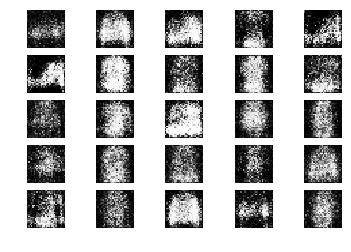

651 [D loss: 0.472797, acc.: 81.25%] [G loss: 1.061211]
652 [D loss: 0.588383, acc.: 68.75%] [G loss: 1.027745]
653 [D loss: 0.503588, acc.: 84.38%] [G loss: 1.032870]
654 [D loss: 0.622362, acc.: 68.75%] [G loss: 1.100629]
655 [D loss: 0.557378, acc.: 73.44%] [G loss: 0.937863]
656 [D loss: 0.581565, acc.: 70.31%] [G loss: 0.986857]
657 [D loss: 0.533062, acc.: 78.12%] [G loss: 1.054500]
658 [D loss: 0.604145, acc.: 71.88%] [G loss: 0.992315]
659 [D loss: 0.611976, acc.: 67.19%] [G loss: 1.004763]
660 [D loss: 0.596183, acc.: 71.88%] [G loss: 0.981330]
661 [D loss: 0.597475, acc.: 68.75%] [G loss: 0.990929]
662 [D loss: 0.581278, acc.: 67.19%] [G loss: 1.057459]
663 [D loss: 0.586836, acc.: 76.56%] [G loss: 1.107461]
664 [D loss: 0.634444, acc.: 65.62%] [G loss: 0.978208]
665 [D loss: 0.657334, acc.: 60.94%] [G loss: 1.029590]
666 [D loss: 0.576022, acc.: 70.31%] [G loss: 1.045954]
667 [D loss: 0.576837, acc.: 70.31%] [G loss: 0.916365]
668 [D loss: 0.581000, acc.: 75.00%] [G loss: 0.

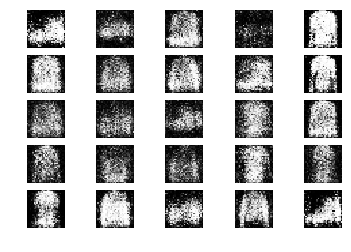

701 [D loss: 0.571292, acc.: 71.88%] [G loss: 1.026183]
702 [D loss: 0.542521, acc.: 76.56%] [G loss: 1.109449]
703 [D loss: 0.595020, acc.: 70.31%] [G loss: 1.044303]
704 [D loss: 0.632880, acc.: 70.31%] [G loss: 0.988494]
705 [D loss: 0.529791, acc.: 76.56%] [G loss: 1.161394]
706 [D loss: 0.516072, acc.: 81.25%] [G loss: 1.018098]
707 [D loss: 0.508974, acc.: 81.25%] [G loss: 1.045282]
708 [D loss: 0.547077, acc.: 65.62%] [G loss: 1.048090]
709 [D loss: 0.593293, acc.: 70.31%] [G loss: 1.045079]
710 [D loss: 0.618936, acc.: 67.19%] [G loss: 1.105568]
711 [D loss: 0.653470, acc.: 60.94%] [G loss: 1.102048]
712 [D loss: 0.562030, acc.: 67.19%] [G loss: 1.217535]
713 [D loss: 0.614744, acc.: 68.75%] [G loss: 1.164642]
714 [D loss: 0.641746, acc.: 59.38%] [G loss: 1.048647]
715 [D loss: 0.571777, acc.: 71.88%] [G loss: 1.048858]
716 [D loss: 0.561994, acc.: 71.88%] [G loss: 1.012185]
717 [D loss: 0.574548, acc.: 75.00%] [G loss: 0.989315]
718 [D loss: 0.613444, acc.: 64.06%] [G loss: 1.

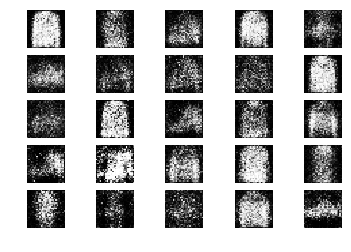

751 [D loss: 0.514058, acc.: 71.88%] [G loss: 1.123130]
752 [D loss: 0.604476, acc.: 68.75%] [G loss: 1.198812]
753 [D loss: 0.517036, acc.: 81.25%] [G loss: 1.075392]
754 [D loss: 0.619041, acc.: 65.62%] [G loss: 0.932719]
755 [D loss: 0.531863, acc.: 71.88%] [G loss: 1.071392]
756 [D loss: 0.533817, acc.: 75.00%] [G loss: 1.109762]
757 [D loss: 0.485893, acc.: 81.25%] [G loss: 0.938833]
758 [D loss: 0.580029, acc.: 70.31%] [G loss: 1.064790]
759 [D loss: 0.554830, acc.: 78.12%] [G loss: 1.050993]
760 [D loss: 0.521639, acc.: 71.88%] [G loss: 1.142463]
761 [D loss: 0.676932, acc.: 65.62%] [G loss: 1.079423]
762 [D loss: 0.627082, acc.: 64.06%] [G loss: 1.221991]
763 [D loss: 0.469822, acc.: 84.38%] [G loss: 0.959154]
764 [D loss: 0.627173, acc.: 67.19%] [G loss: 1.113719]
765 [D loss: 0.583665, acc.: 70.31%] [G loss: 1.112445]
766 [D loss: 0.578229, acc.: 64.06%] [G loss: 1.161231]
767 [D loss: 0.632373, acc.: 68.75%] [G loss: 1.103076]
768 [D loss: 0.580049, acc.: 73.44%] [G loss: 1.

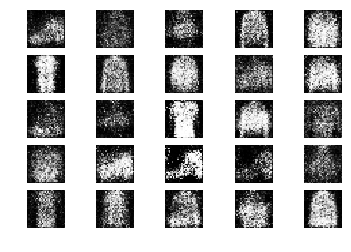

801 [D loss: 0.589592, acc.: 73.44%] [G loss: 1.032310]
802 [D loss: 0.609136, acc.: 71.88%] [G loss: 0.952566]
803 [D loss: 0.581130, acc.: 75.00%] [G loss: 1.033780]
804 [D loss: 0.524631, acc.: 79.69%] [G loss: 0.970122]
805 [D loss: 0.592620, acc.: 62.50%] [G loss: 0.942806]
806 [D loss: 0.588164, acc.: 68.75%] [G loss: 1.041403]
807 [D loss: 0.606285, acc.: 68.75%] [G loss: 1.010083]
808 [D loss: 0.626361, acc.: 65.62%] [G loss: 1.020649]
809 [D loss: 0.587739, acc.: 65.62%] [G loss: 0.929409]
810 [D loss: 0.501065, acc.: 81.25%] [G loss: 1.049057]
811 [D loss: 0.485049, acc.: 78.12%] [G loss: 0.943157]
812 [D loss: 0.580655, acc.: 64.06%] [G loss: 1.025373]
813 [D loss: 0.661103, acc.: 65.62%] [G loss: 1.029893]
814 [D loss: 0.592496, acc.: 75.00%] [G loss: 0.900889]
815 [D loss: 0.474458, acc.: 84.38%] [G loss: 1.064491]
816 [D loss: 0.554888, acc.: 70.31%] [G loss: 0.881605]
817 [D loss: 0.581831, acc.: 64.06%] [G loss: 0.965067]
818 [D loss: 0.595650, acc.: 68.75%] [G loss: 1.

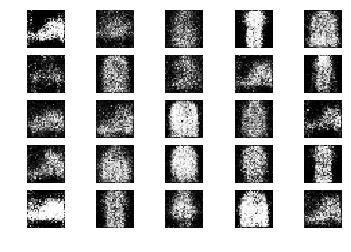

851 [D loss: 0.564737, acc.: 70.31%] [G loss: 0.919056]
852 [D loss: 0.587175, acc.: 71.88%] [G loss: 1.082190]
853 [D loss: 0.583054, acc.: 71.88%] [G loss: 1.018104]
854 [D loss: 0.554072, acc.: 70.31%] [G loss: 0.889106]
855 [D loss: 0.626105, acc.: 60.94%] [G loss: 0.985716]
856 [D loss: 0.626428, acc.: 67.19%] [G loss: 0.913533]
857 [D loss: 0.600125, acc.: 68.75%] [G loss: 0.950279]
858 [D loss: 0.622041, acc.: 65.62%] [G loss: 1.061200]
859 [D loss: 0.545239, acc.: 70.31%] [G loss: 1.127952]
860 [D loss: 0.598996, acc.: 73.44%] [G loss: 1.066689]
861 [D loss: 0.675304, acc.: 57.81%] [G loss: 1.181314]
862 [D loss: 0.596978, acc.: 70.31%] [G loss: 1.127911]
863 [D loss: 0.548228, acc.: 78.12%] [G loss: 1.006012]
864 [D loss: 0.611716, acc.: 68.75%] [G loss: 1.006033]
865 [D loss: 0.579187, acc.: 70.31%] [G loss: 0.967283]
866 [D loss: 0.566972, acc.: 67.19%] [G loss: 0.951462]
867 [D loss: 0.561626, acc.: 75.00%] [G loss: 1.062221]
868 [D loss: 0.617249, acc.: 68.75%] [G loss: 1.

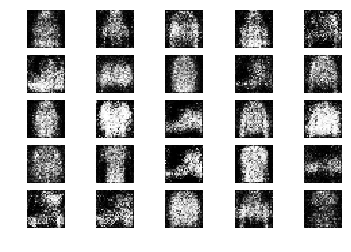

901 [D loss: 0.625932, acc.: 71.88%] [G loss: 1.004079]
902 [D loss: 0.598257, acc.: 70.31%] [G loss: 0.920716]
903 [D loss: 0.641716, acc.: 70.31%] [G loss: 1.039757]
904 [D loss: 0.658325, acc.: 60.94%] [G loss: 1.006033]
905 [D loss: 0.609099, acc.: 70.31%] [G loss: 0.984197]
906 [D loss: 0.558157, acc.: 79.69%] [G loss: 1.030794]
907 [D loss: 0.617687, acc.: 67.19%] [G loss: 0.843581]
908 [D loss: 0.591397, acc.: 64.06%] [G loss: 0.967554]
909 [D loss: 0.670130, acc.: 62.50%] [G loss: 0.922026]
910 [D loss: 0.684768, acc.: 65.62%] [G loss: 1.019857]
911 [D loss: 0.643586, acc.: 65.62%] [G loss: 0.994467]
912 [D loss: 0.668039, acc.: 60.94%] [G loss: 0.996629]
913 [D loss: 0.560712, acc.: 71.88%] [G loss: 0.902139]
914 [D loss: 0.599319, acc.: 60.94%] [G loss: 1.025567]
915 [D loss: 0.651762, acc.: 60.94%] [G loss: 1.034658]
916 [D loss: 0.559982, acc.: 75.00%] [G loss: 0.964301]
917 [D loss: 0.643620, acc.: 65.62%] [G loss: 1.031943]
918 [D loss: 0.531748, acc.: 79.69%] [G loss: 0.

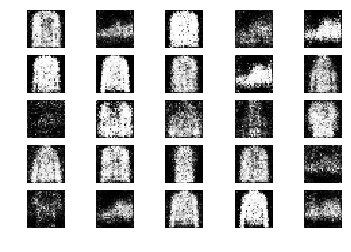

951 [D loss: 0.671422, acc.: 56.25%] [G loss: 0.945551]
952 [D loss: 0.589828, acc.: 67.19%] [G loss: 0.993181]
953 [D loss: 0.645444, acc.: 64.06%] [G loss: 0.999278]
954 [D loss: 0.587866, acc.: 73.44%] [G loss: 1.007575]
955 [D loss: 0.735519, acc.: 53.12%] [G loss: 1.044845]
956 [D loss: 0.598453, acc.: 67.19%] [G loss: 0.827463]
957 [D loss: 0.666840, acc.: 62.50%] [G loss: 0.984780]
958 [D loss: 0.615984, acc.: 68.75%] [G loss: 0.886893]
959 [D loss: 0.614314, acc.: 62.50%] [G loss: 0.953780]
960 [D loss: 0.528080, acc.: 85.94%] [G loss: 0.928652]
961 [D loss: 0.586716, acc.: 71.88%] [G loss: 0.978706]
962 [D loss: 0.531461, acc.: 78.12%] [G loss: 1.017580]
963 [D loss: 0.572482, acc.: 76.56%] [G loss: 1.001730]
964 [D loss: 0.585479, acc.: 68.75%] [G loss: 0.988810]
965 [D loss: 0.556152, acc.: 73.44%] [G loss: 0.998545]
966 [D loss: 0.606574, acc.: 71.88%] [G loss: 1.017707]
967 [D loss: 0.616739, acc.: 68.75%] [G loss: 0.972893]
968 [D loss: 0.670672, acc.: 64.06%] [G loss: 0.

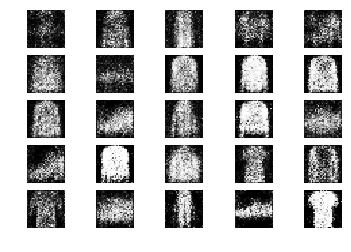

1001 [D loss: 0.603095, acc.: 70.31%] [G loss: 0.983423]
1002 [D loss: 0.675599, acc.: 67.19%] [G loss: 0.959693]
1003 [D loss: 0.648399, acc.: 68.75%] [G loss: 0.932951]
1004 [D loss: 0.503268, acc.: 81.25%] [G loss: 0.927997]
1005 [D loss: 0.598983, acc.: 71.88%] [G loss: 1.050043]
1006 [D loss: 0.647520, acc.: 65.62%] [G loss: 1.009945]
1007 [D loss: 0.589899, acc.: 67.19%] [G loss: 0.992474]
1008 [D loss: 0.565212, acc.: 75.00%] [G loss: 0.976071]
1009 [D loss: 0.644578, acc.: 60.94%] [G loss: 0.954747]
1010 [D loss: 0.643653, acc.: 70.31%] [G loss: 0.920439]
1011 [D loss: 0.571394, acc.: 76.56%] [G loss: 0.877070]
1012 [D loss: 0.585988, acc.: 64.06%] [G loss: 0.893728]
1013 [D loss: 0.643887, acc.: 60.94%] [G loss: 0.949049]
1014 [D loss: 0.598506, acc.: 73.44%] [G loss: 1.005002]
1015 [D loss: 0.658208, acc.: 57.81%] [G loss: 0.913928]
1016 [D loss: 0.654744, acc.: 57.81%] [G loss: 0.935394]
1017 [D loss: 0.668588, acc.: 53.12%] [G loss: 0.847852]
1018 [D loss: 0.703577, acc.: 5

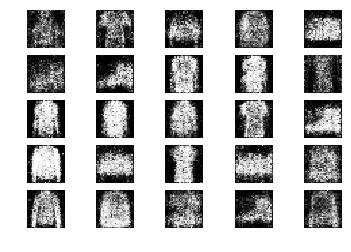

1051 [D loss: 0.576296, acc.: 70.31%] [G loss: 0.863349]
1052 [D loss: 0.588146, acc.: 68.75%] [G loss: 0.937760]
1053 [D loss: 0.611504, acc.: 68.75%] [G loss: 0.907160]
1054 [D loss: 0.656999, acc.: 64.06%] [G loss: 0.884500]
1055 [D loss: 0.697630, acc.: 64.06%] [G loss: 0.904315]
1056 [D loss: 0.610745, acc.: 70.31%] [G loss: 0.866662]
1057 [D loss: 0.658059, acc.: 57.81%] [G loss: 0.939317]
1058 [D loss: 0.589363, acc.: 71.88%] [G loss: 0.912396]
1059 [D loss: 0.594156, acc.: 67.19%] [G loss: 0.893019]
1060 [D loss: 0.622990, acc.: 65.62%] [G loss: 1.008816]
1061 [D loss: 0.595501, acc.: 68.75%] [G loss: 0.943201]
1062 [D loss: 0.612364, acc.: 70.31%] [G loss: 0.791443]
1063 [D loss: 0.585038, acc.: 70.31%] [G loss: 0.796058]
1064 [D loss: 0.552649, acc.: 73.44%] [G loss: 0.887615]
1065 [D loss: 0.681308, acc.: 62.50%] [G loss: 1.008810]
1066 [D loss: 0.591072, acc.: 67.19%] [G loss: 0.949123]
1067 [D loss: 0.526833, acc.: 84.38%] [G loss: 1.067159]
1068 [D loss: 0.575364, acc.: 7

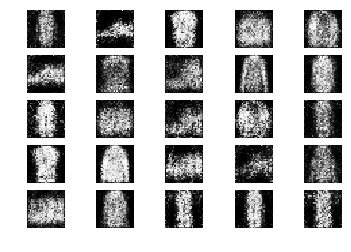

1101 [D loss: 0.627381, acc.: 65.62%] [G loss: 1.086026]
1102 [D loss: 0.604565, acc.: 70.31%] [G loss: 0.962599]
1103 [D loss: 0.618587, acc.: 64.06%] [G loss: 0.918429]
1104 [D loss: 0.736715, acc.: 53.12%] [G loss: 0.969778]
1105 [D loss: 0.620886, acc.: 65.62%] [G loss: 0.954693]
1106 [D loss: 0.683719, acc.: 59.38%] [G loss: 0.906936]
1107 [D loss: 0.569941, acc.: 71.88%] [G loss: 0.789228]
1108 [D loss: 0.644013, acc.: 68.75%] [G loss: 0.940148]
1109 [D loss: 0.559685, acc.: 64.06%] [G loss: 1.045230]
1110 [D loss: 0.601543, acc.: 71.88%] [G loss: 1.015525]
1111 [D loss: 0.639084, acc.: 60.94%] [G loss: 1.065053]
1112 [D loss: 0.605194, acc.: 67.19%] [G loss: 0.926946]
1113 [D loss: 0.660391, acc.: 64.06%] [G loss: 0.959569]
1114 [D loss: 0.580512, acc.: 78.12%] [G loss: 1.025154]
1115 [D loss: 0.611744, acc.: 68.75%] [G loss: 0.986954]
1116 [D loss: 0.668290, acc.: 67.19%] [G loss: 0.933314]
1117 [D loss: 0.638464, acc.: 64.06%] [G loss: 0.915150]
1118 [D loss: 0.569967, acc.: 7

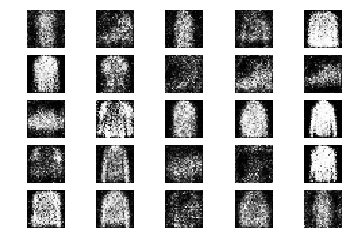

1151 [D loss: 0.639957, acc.: 62.50%] [G loss: 1.018676]
1152 [D loss: 0.619435, acc.: 71.88%] [G loss: 0.958042]
1153 [D loss: 0.542666, acc.: 70.31%] [G loss: 1.026553]
1154 [D loss: 0.560111, acc.: 71.88%] [G loss: 1.013145]
1155 [D loss: 0.572831, acc.: 78.12%] [G loss: 0.978792]
1156 [D loss: 0.676770, acc.: 60.94%] [G loss: 0.930356]
1157 [D loss: 0.641636, acc.: 57.81%] [G loss: 0.909662]
1158 [D loss: 0.617051, acc.: 67.19%] [G loss: 0.884501]
1159 [D loss: 0.576473, acc.: 67.19%] [G loss: 0.932567]
1160 [D loss: 0.615748, acc.: 62.50%] [G loss: 1.053100]
1161 [D loss: 0.675784, acc.: 56.25%] [G loss: 0.997909]
1162 [D loss: 0.616807, acc.: 67.19%] [G loss: 0.911173]
1163 [D loss: 0.576130, acc.: 65.62%] [G loss: 0.909186]
1164 [D loss: 0.609543, acc.: 65.62%] [G loss: 0.946780]
1165 [D loss: 0.615635, acc.: 67.19%] [G loss: 0.872825]
1166 [D loss: 0.588973, acc.: 60.94%] [G loss: 0.998861]
1167 [D loss: 0.614351, acc.: 65.62%] [G loss: 1.019127]
1168 [D loss: 0.607156, acc.: 6

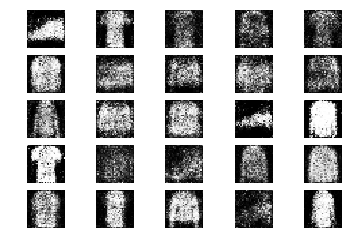

1201 [D loss: 0.611556, acc.: 70.31%] [G loss: 0.952102]
1202 [D loss: 0.671431, acc.: 59.38%] [G loss: 1.011162]
1203 [D loss: 0.663622, acc.: 60.94%] [G loss: 0.954236]
1204 [D loss: 0.568700, acc.: 68.75%] [G loss: 0.957560]
1205 [D loss: 0.640321, acc.: 64.06%] [G loss: 0.990471]
1206 [D loss: 0.636564, acc.: 71.88%] [G loss: 0.894592]
1207 [D loss: 0.552145, acc.: 82.81%] [G loss: 0.892317]
1208 [D loss: 0.610786, acc.: 65.62%] [G loss: 0.741559]
1209 [D loss: 0.656507, acc.: 64.06%] [G loss: 0.812565]
1210 [D loss: 0.640828, acc.: 65.62%] [G loss: 0.938691]
1211 [D loss: 0.625330, acc.: 64.06%] [G loss: 0.872068]
1212 [D loss: 0.634652, acc.: 68.75%] [G loss: 0.915450]
1213 [D loss: 0.604594, acc.: 67.19%] [G loss: 0.866743]
1214 [D loss: 0.622340, acc.: 67.19%] [G loss: 0.852555]
1215 [D loss: 0.594546, acc.: 68.75%] [G loss: 0.901501]
1216 [D loss: 0.659730, acc.: 65.62%] [G loss: 0.924692]
1217 [D loss: 0.606521, acc.: 62.50%] [G loss: 0.907336]
1218 [D loss: 0.658539, acc.: 6

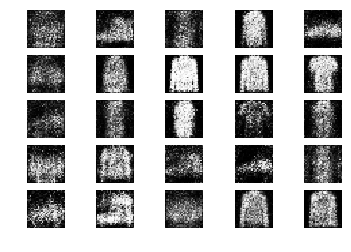

1251 [D loss: 0.628782, acc.: 64.06%] [G loss: 0.930616]
1252 [D loss: 0.619700, acc.: 71.88%] [G loss: 0.921371]
1253 [D loss: 0.569988, acc.: 62.50%] [G loss: 0.972596]
1254 [D loss: 0.559624, acc.: 73.44%] [G loss: 0.940770]
1255 [D loss: 0.657972, acc.: 59.38%] [G loss: 0.942097]
1256 [D loss: 0.691440, acc.: 59.38%] [G loss: 0.956838]
1257 [D loss: 0.628578, acc.: 67.19%] [G loss: 1.045132]
1258 [D loss: 0.619893, acc.: 64.06%] [G loss: 0.946669]
1259 [D loss: 0.605955, acc.: 67.19%] [G loss: 0.915652]
1260 [D loss: 0.657547, acc.: 57.81%] [G loss: 0.815833]
1261 [D loss: 0.589389, acc.: 68.75%] [G loss: 0.909407]
1262 [D loss: 0.606978, acc.: 67.19%] [G loss: 0.909062]
1263 [D loss: 0.594389, acc.: 70.31%] [G loss: 0.849211]
1264 [D loss: 0.588687, acc.: 71.88%] [G loss: 0.859805]
1265 [D loss: 0.571633, acc.: 73.44%] [G loss: 0.940704]
1266 [D loss: 0.661236, acc.: 68.75%] [G loss: 1.015943]
1267 [D loss: 0.643301, acc.: 60.94%] [G loss: 0.953962]
1268 [D loss: 0.642890, acc.: 6

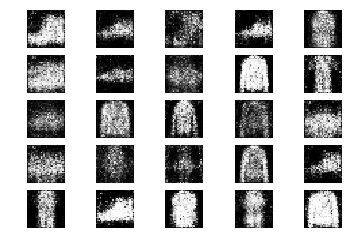

1301 [D loss: 0.650822, acc.: 57.81%] [G loss: 0.765436]
1302 [D loss: 0.663078, acc.: 53.12%] [G loss: 0.825917]
1303 [D loss: 0.573545, acc.: 70.31%] [G loss: 0.924647]
1304 [D loss: 0.584035, acc.: 67.19%] [G loss: 0.925420]
1305 [D loss: 0.615111, acc.: 60.94%] [G loss: 0.881819]
1306 [D loss: 0.646767, acc.: 64.06%] [G loss: 0.936475]
1307 [D loss: 0.617565, acc.: 73.44%] [G loss: 0.932284]
1308 [D loss: 0.579351, acc.: 75.00%] [G loss: 0.955786]
1309 [D loss: 0.626349, acc.: 68.75%] [G loss: 0.900002]
1310 [D loss: 0.584546, acc.: 71.88%] [G loss: 0.828146]
1311 [D loss: 0.636665, acc.: 64.06%] [G loss: 0.863353]
1312 [D loss: 0.637618, acc.: 64.06%] [G loss: 0.933930]
1313 [D loss: 0.601265, acc.: 67.19%] [G loss: 0.953542]
1314 [D loss: 0.665520, acc.: 60.94%] [G loss: 0.966536]
1315 [D loss: 0.618788, acc.: 64.06%] [G loss: 1.026701]
1316 [D loss: 0.625171, acc.: 70.31%] [G loss: 0.944380]
1317 [D loss: 0.638798, acc.: 64.06%] [G loss: 0.928838]
1318 [D loss: 0.704765, acc.: 5

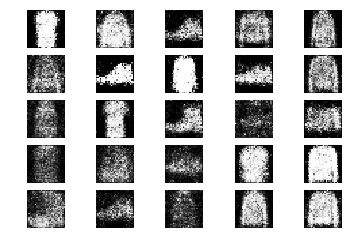

1351 [D loss: 0.589005, acc.: 64.06%] [G loss: 0.947482]
1352 [D loss: 0.591679, acc.: 70.31%] [G loss: 0.925257]
1353 [D loss: 0.628056, acc.: 73.44%] [G loss: 1.019175]
1354 [D loss: 0.655952, acc.: 68.75%] [G loss: 0.898097]
1355 [D loss: 0.599670, acc.: 62.50%] [G loss: 0.880324]
1356 [D loss: 0.602935, acc.: 70.31%] [G loss: 0.898359]
1357 [D loss: 0.619942, acc.: 71.88%] [G loss: 0.947986]
1358 [D loss: 0.599371, acc.: 60.94%] [G loss: 0.917141]
1359 [D loss: 0.600580, acc.: 67.19%] [G loss: 1.003811]
1360 [D loss: 0.620939, acc.: 68.75%] [G loss: 0.841099]
1361 [D loss: 0.579364, acc.: 75.00%] [G loss: 0.957083]
1362 [D loss: 0.751497, acc.: 56.25%] [G loss: 0.864734]
1363 [D loss: 0.632080, acc.: 62.50%] [G loss: 0.987082]
1364 [D loss: 0.618258, acc.: 65.62%] [G loss: 0.893418]
1365 [D loss: 0.641440, acc.: 65.62%] [G loss: 0.873259]
1366 [D loss: 0.636012, acc.: 67.19%] [G loss: 0.871362]
1367 [D loss: 0.622413, acc.: 62.50%] [G loss: 0.981492]
1368 [D loss: 0.544435, acc.: 7

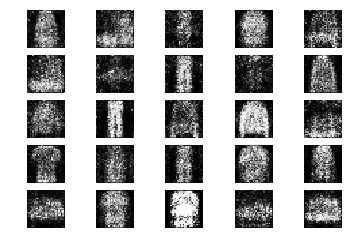

1401 [D loss: 0.600327, acc.: 71.88%] [G loss: 0.932179]
1402 [D loss: 0.615280, acc.: 67.19%] [G loss: 0.835173]
1403 [D loss: 0.591809, acc.: 73.44%] [G loss: 0.890768]
1404 [D loss: 0.479304, acc.: 76.56%] [G loss: 0.859744]
1405 [D loss: 0.656158, acc.: 64.06%] [G loss: 0.892690]
1406 [D loss: 0.637128, acc.: 56.25%] [G loss: 0.905117]
1407 [D loss: 0.526045, acc.: 76.56%] [G loss: 0.959127]
1408 [D loss: 0.645986, acc.: 60.94%] [G loss: 0.934029]
1409 [D loss: 0.613575, acc.: 62.50%] [G loss: 1.074045]
1410 [D loss: 0.632263, acc.: 56.25%] [G loss: 0.991876]
1411 [D loss: 0.588039, acc.: 71.88%] [G loss: 0.954836]
1412 [D loss: 0.648570, acc.: 64.06%] [G loss: 0.841975]
1413 [D loss: 0.647612, acc.: 62.50%] [G loss: 0.987237]
1414 [D loss: 0.604254, acc.: 70.31%] [G loss: 0.886665]
1415 [D loss: 0.685688, acc.: 59.38%] [G loss: 0.924365]
1416 [D loss: 0.632133, acc.: 65.62%] [G loss: 0.999195]
1417 [D loss: 0.621707, acc.: 59.38%] [G loss: 0.948312]
1418 [D loss: 0.606814, acc.: 6

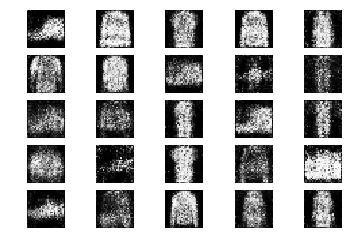

1451 [D loss: 0.595453, acc.: 65.62%] [G loss: 0.957834]
1452 [D loss: 0.711811, acc.: 51.56%] [G loss: 0.923546]
1453 [D loss: 0.646080, acc.: 67.19%] [G loss: 0.941135]
1454 [D loss: 0.555174, acc.: 75.00%] [G loss: 0.957873]
1455 [D loss: 0.662421, acc.: 56.25%] [G loss: 0.976031]
1456 [D loss: 0.568697, acc.: 71.88%] [G loss: 0.900533]
1457 [D loss: 0.602750, acc.: 71.88%] [G loss: 0.928535]
1458 [D loss: 0.582206, acc.: 67.19%] [G loss: 0.902609]
1459 [D loss: 0.589172, acc.: 73.44%] [G loss: 0.895092]
1460 [D loss: 0.608814, acc.: 68.75%] [G loss: 0.851476]
1461 [D loss: 0.549895, acc.: 70.31%] [G loss: 0.937030]
1462 [D loss: 0.569319, acc.: 78.12%] [G loss: 0.940158]
1463 [D loss: 0.637942, acc.: 54.69%] [G loss: 0.818364]
1464 [D loss: 0.561189, acc.: 75.00%] [G loss: 0.902464]
1465 [D loss: 0.591021, acc.: 75.00%] [G loss: 0.986956]
1466 [D loss: 0.628975, acc.: 73.44%] [G loss: 0.889762]
1467 [D loss: 0.582399, acc.: 75.00%] [G loss: 0.957258]
1468 [D loss: 0.580950, acc.: 6

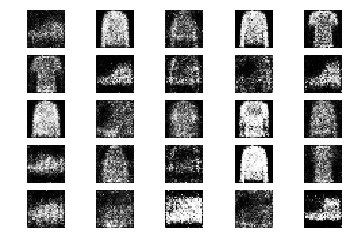

1501 [D loss: 0.622070, acc.: 68.75%] [G loss: 1.143600]
1502 [D loss: 0.607139, acc.: 67.19%] [G loss: 0.940725]
1503 [D loss: 0.587469, acc.: 67.19%] [G loss: 0.989964]
1504 [D loss: 0.697815, acc.: 57.81%] [G loss: 0.923359]
1505 [D loss: 0.600760, acc.: 64.06%] [G loss: 1.016066]
1506 [D loss: 0.609776, acc.: 70.31%] [G loss: 0.937682]
1507 [D loss: 0.706057, acc.: 51.56%] [G loss: 0.875897]
1508 [D loss: 0.632838, acc.: 68.75%] [G loss: 0.885020]
1509 [D loss: 0.676326, acc.: 59.38%] [G loss: 0.884426]
1510 [D loss: 0.615865, acc.: 62.50%] [G loss: 0.958471]
1511 [D loss: 0.623087, acc.: 65.62%] [G loss: 0.983462]
1512 [D loss: 0.634347, acc.: 67.19%] [G loss: 0.894587]
1513 [D loss: 0.592729, acc.: 68.75%] [G loss: 0.891311]
1514 [D loss: 0.611903, acc.: 65.62%] [G loss: 0.877769]
1515 [D loss: 0.566892, acc.: 68.75%] [G loss: 0.825542]
1516 [D loss: 0.647106, acc.: 62.50%] [G loss: 0.990774]
1517 [D loss: 0.615147, acc.: 65.62%] [G loss: 0.944193]
1518 [D loss: 0.609739, acc.: 6

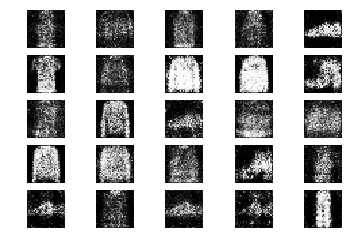

1551 [D loss: 0.584091, acc.: 70.31%] [G loss: 0.899855]
1552 [D loss: 0.587041, acc.: 65.62%] [G loss: 0.941227]
1553 [D loss: 0.518221, acc.: 84.38%] [G loss: 0.954731]
1554 [D loss: 0.593862, acc.: 67.19%] [G loss: 0.905694]
1555 [D loss: 0.577338, acc.: 73.44%] [G loss: 0.891028]
1556 [D loss: 0.647914, acc.: 53.12%] [G loss: 0.825903]
1557 [D loss: 0.572036, acc.: 73.44%] [G loss: 1.019571]
1558 [D loss: 0.647019, acc.: 59.38%] [G loss: 0.880494]
1559 [D loss: 0.598003, acc.: 68.75%] [G loss: 0.966181]
1560 [D loss: 0.613919, acc.: 68.75%] [G loss: 0.881258]
1561 [D loss: 0.625393, acc.: 62.50%] [G loss: 0.947351]
1562 [D loss: 0.564577, acc.: 76.56%] [G loss: 1.063709]
1563 [D loss: 0.608643, acc.: 68.75%] [G loss: 0.954078]
1564 [D loss: 0.615394, acc.: 65.62%] [G loss: 1.005210]
1565 [D loss: 0.573966, acc.: 76.56%] [G loss: 0.904822]
1566 [D loss: 0.598815, acc.: 70.31%] [G loss: 0.939856]
1567 [D loss: 0.570939, acc.: 68.75%] [G loss: 0.928306]
1568 [D loss: 0.591358, acc.: 7

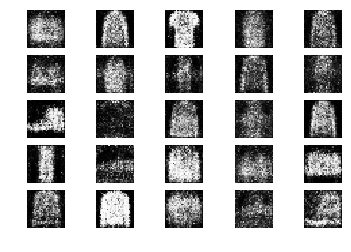

1601 [D loss: 0.679883, acc.: 54.69%] [G loss: 0.930136]
1602 [D loss: 0.646519, acc.: 60.94%] [G loss: 0.970712]
1603 [D loss: 0.603084, acc.: 68.75%] [G loss: 0.886620]
1604 [D loss: 0.560014, acc.: 71.88%] [G loss: 0.907812]
1605 [D loss: 0.636035, acc.: 59.38%] [G loss: 0.929977]
1606 [D loss: 0.615153, acc.: 68.75%] [G loss: 0.915637]
1607 [D loss: 0.593314, acc.: 70.31%] [G loss: 1.010466]
1608 [D loss: 0.605855, acc.: 57.81%] [G loss: 1.021127]
1609 [D loss: 0.570333, acc.: 79.69%] [G loss: 0.941073]
1610 [D loss: 0.681660, acc.: 64.06%] [G loss: 0.934161]
1611 [D loss: 0.667239, acc.: 64.06%] [G loss: 0.849640]
1612 [D loss: 0.589643, acc.: 75.00%] [G loss: 0.925535]
1613 [D loss: 0.553502, acc.: 71.88%] [G loss: 0.875572]
1614 [D loss: 0.609806, acc.: 65.62%] [G loss: 0.985038]
1615 [D loss: 0.568777, acc.: 75.00%] [G loss: 0.975222]
1616 [D loss: 0.647829, acc.: 62.50%] [G loss: 0.862709]
1617 [D loss: 0.721971, acc.: 59.38%] [G loss: 0.909024]
1618 [D loss: 0.534930, acc.: 6

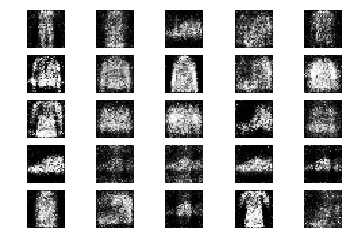

1651 [D loss: 0.617601, acc.: 68.75%] [G loss: 0.854185]
1652 [D loss: 0.657750, acc.: 50.00%] [G loss: 0.879812]
1653 [D loss: 0.558603, acc.: 71.88%] [G loss: 0.908650]
1654 [D loss: 0.576192, acc.: 73.44%] [G loss: 0.919635]
1655 [D loss: 0.602898, acc.: 62.50%] [G loss: 0.901209]
1656 [D loss: 0.589027, acc.: 65.62%] [G loss: 1.015452]
1657 [D loss: 0.668822, acc.: 50.00%] [G loss: 0.879421]
1658 [D loss: 0.623877, acc.: 64.06%] [G loss: 0.935630]
1659 [D loss: 0.600241, acc.: 65.62%] [G loss: 0.927090]
1660 [D loss: 0.593977, acc.: 70.31%] [G loss: 0.934978]
1661 [D loss: 0.660838, acc.: 54.69%] [G loss: 0.948350]
1662 [D loss: 0.624207, acc.: 65.62%] [G loss: 0.990798]
1663 [D loss: 0.624148, acc.: 62.50%] [G loss: 0.879410]
1664 [D loss: 0.588436, acc.: 75.00%] [G loss: 0.908224]
1665 [D loss: 0.568528, acc.: 75.00%] [G loss: 0.882062]
1666 [D loss: 0.676729, acc.: 57.81%] [G loss: 0.873529]
1667 [D loss: 0.630535, acc.: 64.06%] [G loss: 0.886209]
1668 [D loss: 0.624832, acc.: 6

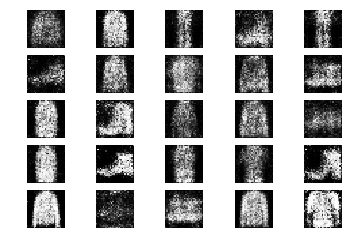

1701 [D loss: 0.639291, acc.: 57.81%] [G loss: 0.934318]
1702 [D loss: 0.669359, acc.: 57.81%] [G loss: 0.911951]
1703 [D loss: 0.597286, acc.: 64.06%] [G loss: 0.890197]
1704 [D loss: 0.574662, acc.: 70.31%] [G loss: 0.888253]
1705 [D loss: 0.661507, acc.: 57.81%] [G loss: 0.926185]
1706 [D loss: 0.648113, acc.: 62.50%] [G loss: 0.961241]
1707 [D loss: 0.574581, acc.: 68.75%] [G loss: 0.885787]
1708 [D loss: 0.653767, acc.: 60.94%] [G loss: 0.944619]
1709 [D loss: 0.680372, acc.: 56.25%] [G loss: 0.931482]
1710 [D loss: 0.535743, acc.: 79.69%] [G loss: 0.972168]
1711 [D loss: 0.601203, acc.: 68.75%] [G loss: 0.924689]
1712 [D loss: 0.655577, acc.: 56.25%] [G loss: 0.910758]
1713 [D loss: 0.661683, acc.: 62.50%] [G loss: 0.892069]
1714 [D loss: 0.676461, acc.: 57.81%] [G loss: 0.891002]
1715 [D loss: 0.646388, acc.: 60.94%] [G loss: 0.951595]
1716 [D loss: 0.668843, acc.: 60.94%] [G loss: 0.845841]
1717 [D loss: 0.673296, acc.: 59.38%] [G loss: 0.802672]
1718 [D loss: 0.599182, acc.: 7

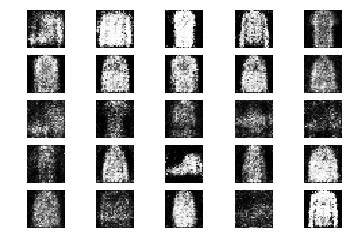

1751 [D loss: 0.659710, acc.: 57.81%] [G loss: 0.994628]
1752 [D loss: 0.604969, acc.: 64.06%] [G loss: 0.964034]
1753 [D loss: 0.636510, acc.: 65.62%] [G loss: 0.884215]
1754 [D loss: 0.610842, acc.: 62.50%] [G loss: 0.964146]
1755 [D loss: 0.668438, acc.: 59.38%] [G loss: 0.987693]
1756 [D loss: 0.646212, acc.: 62.50%] [G loss: 0.916378]
1757 [D loss: 0.580111, acc.: 71.88%] [G loss: 0.976569]
1758 [D loss: 0.648550, acc.: 62.50%] [G loss: 0.871348]
1759 [D loss: 0.598247, acc.: 65.62%] [G loss: 0.903558]
1760 [D loss: 0.642324, acc.: 65.62%] [G loss: 0.911289]
1761 [D loss: 0.608632, acc.: 60.94%] [G loss: 0.961900]
1762 [D loss: 0.665986, acc.: 71.88%] [G loss: 0.818277]
1763 [D loss: 0.628600, acc.: 64.06%] [G loss: 0.941014]
1764 [D loss: 0.562458, acc.: 76.56%] [G loss: 0.975028]
1765 [D loss: 0.624043, acc.: 64.06%] [G loss: 0.943570]
1766 [D loss: 0.607488, acc.: 60.94%] [G loss: 0.963144]
1767 [D loss: 0.702264, acc.: 54.69%] [G loss: 0.876028]
1768 [D loss: 0.596172, acc.: 7

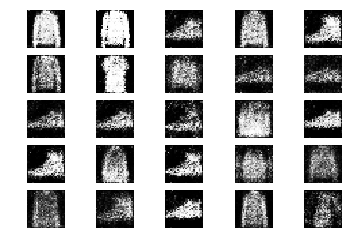

1801 [D loss: 0.694214, acc.: 57.81%] [G loss: 0.984445]
1802 [D loss: 0.710573, acc.: 53.12%] [G loss: 0.987173]
1803 [D loss: 0.588833, acc.: 76.56%] [G loss: 0.937442]
1804 [D loss: 0.588254, acc.: 71.88%] [G loss: 0.872858]
1805 [D loss: 0.635140, acc.: 62.50%] [G loss: 0.899168]
1806 [D loss: 0.602019, acc.: 67.19%] [G loss: 0.847274]
1807 [D loss: 0.578424, acc.: 73.44%] [G loss: 0.964756]
1808 [D loss: 0.683020, acc.: 60.94%] [G loss: 0.900184]
1809 [D loss: 0.575666, acc.: 67.19%] [G loss: 0.960349]
1810 [D loss: 0.617744, acc.: 68.75%] [G loss: 0.935715]
1811 [D loss: 0.617476, acc.: 67.19%] [G loss: 0.979464]
1812 [D loss: 0.601829, acc.: 67.19%] [G loss: 1.029775]
1813 [D loss: 0.598737, acc.: 65.62%] [G loss: 0.979641]
1814 [D loss: 0.649709, acc.: 56.25%] [G loss: 0.952889]
1815 [D loss: 0.579076, acc.: 75.00%] [G loss: 0.985116]
1816 [D loss: 0.638192, acc.: 62.50%] [G loss: 0.895145]
1817 [D loss: 0.560626, acc.: 75.00%] [G loss: 0.825099]
1818 [D loss: 0.574932, acc.: 7

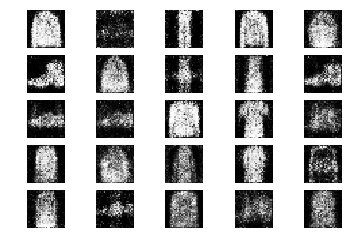

1851 [D loss: 0.610034, acc.: 71.88%] [G loss: 0.926447]
1852 [D loss: 0.665197, acc.: 59.38%] [G loss: 0.877183]
1853 [D loss: 0.628758, acc.: 62.50%] [G loss: 0.937271]
1854 [D loss: 0.540428, acc.: 76.56%] [G loss: 0.932538]
1855 [D loss: 0.651418, acc.: 62.50%] [G loss: 0.915814]
1856 [D loss: 0.629996, acc.: 68.75%] [G loss: 0.976673]
1857 [D loss: 0.576715, acc.: 71.88%] [G loss: 1.008582]
1858 [D loss: 0.656070, acc.: 64.06%] [G loss: 0.958300]
1859 [D loss: 0.601401, acc.: 67.19%] [G loss: 0.880731]
1860 [D loss: 0.666297, acc.: 56.25%] [G loss: 0.964757]
1861 [D loss: 0.613078, acc.: 65.62%] [G loss: 0.899754]
1862 [D loss: 0.608872, acc.: 64.06%] [G loss: 1.075489]
1863 [D loss: 0.619538, acc.: 62.50%] [G loss: 0.880842]
1864 [D loss: 0.593710, acc.: 67.19%] [G loss: 0.937338]
1865 [D loss: 0.613195, acc.: 67.19%] [G loss: 0.902642]
1866 [D loss: 0.596453, acc.: 64.06%] [G loss: 0.976012]
1867 [D loss: 0.649985, acc.: 62.50%] [G loss: 0.948843]
1868 [D loss: 0.590891, acc.: 6

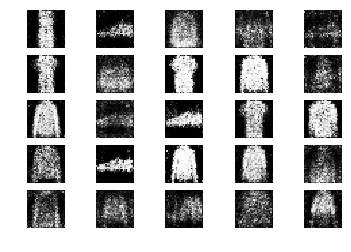

1901 [D loss: 0.576045, acc.: 68.75%] [G loss: 0.969492]
1902 [D loss: 0.595690, acc.: 70.31%] [G loss: 0.882686]
1903 [D loss: 0.628824, acc.: 64.06%] [G loss: 0.909649]
1904 [D loss: 0.554118, acc.: 81.25%] [G loss: 0.834380]
1905 [D loss: 0.697144, acc.: 65.62%] [G loss: 0.909056]
1906 [D loss: 0.614680, acc.: 68.75%] [G loss: 0.963330]
1907 [D loss: 0.596163, acc.: 60.94%] [G loss: 0.989178]
1908 [D loss: 0.597603, acc.: 68.75%] [G loss: 0.954646]
1909 [D loss: 0.668212, acc.: 53.12%] [G loss: 0.977391]
1910 [D loss: 0.652856, acc.: 64.06%] [G loss: 0.933027]
1911 [D loss: 0.596170, acc.: 67.19%] [G loss: 0.936560]
1912 [D loss: 0.599105, acc.: 73.44%] [G loss: 0.887271]
1913 [D loss: 0.620008, acc.: 67.19%] [G loss: 0.962501]
1914 [D loss: 0.658424, acc.: 64.06%] [G loss: 0.857492]
1915 [D loss: 0.643619, acc.: 60.94%] [G loss: 1.012661]
1916 [D loss: 0.668436, acc.: 62.50%] [G loss: 0.930484]
1917 [D loss: 0.528440, acc.: 76.56%] [G loss: 1.013593]
1918 [D loss: 0.604367, acc.: 7

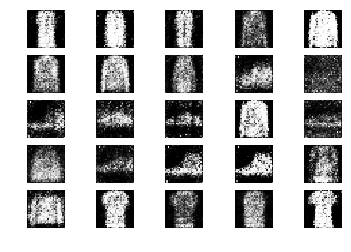

1951 [D loss: 0.580650, acc.: 71.88%] [G loss: 0.957539]
1952 [D loss: 0.579108, acc.: 71.88%] [G loss: 0.963278]
1953 [D loss: 0.690739, acc.: 54.69%] [G loss: 1.027731]
1954 [D loss: 0.618927, acc.: 70.31%] [G loss: 0.975426]
1955 [D loss: 0.637766, acc.: 60.94%] [G loss: 1.016136]
1956 [D loss: 0.602088, acc.: 71.88%] [G loss: 0.880469]
1957 [D loss: 0.580966, acc.: 71.88%] [G loss: 0.920786]
1958 [D loss: 0.688784, acc.: 62.50%] [G loss: 0.912366]
1959 [D loss: 0.614608, acc.: 67.19%] [G loss: 0.919541]
1960 [D loss: 0.635503, acc.: 64.06%] [G loss: 0.905836]
1961 [D loss: 0.629466, acc.: 62.50%] [G loss: 0.893714]
1962 [D loss: 0.655878, acc.: 59.38%] [G loss: 0.959347]
1963 [D loss: 0.523410, acc.: 81.25%] [G loss: 0.914485]
1964 [D loss: 0.551523, acc.: 75.00%] [G loss: 0.852346]
1965 [D loss: 0.564193, acc.: 76.56%] [G loss: 0.954871]
1966 [D loss: 0.589681, acc.: 71.88%] [G loss: 0.913409]
1967 [D loss: 0.641452, acc.: 60.94%] [G loss: 0.904281]
1968 [D loss: 0.671564, acc.: 5

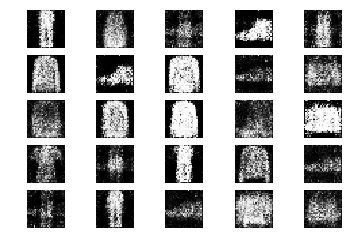

2001 [D loss: 0.591921, acc.: 75.00%] [G loss: 0.909467]
2002 [D loss: 0.654554, acc.: 67.19%] [G loss: 1.081132]
2003 [D loss: 0.601531, acc.: 67.19%] [G loss: 0.969348]
2004 [D loss: 0.630341, acc.: 67.19%] [G loss: 0.953144]
2005 [D loss: 0.630269, acc.: 65.62%] [G loss: 0.924475]
2006 [D loss: 0.569798, acc.: 64.06%] [G loss: 0.886404]
2007 [D loss: 0.597172, acc.: 70.31%] [G loss: 1.005126]
2008 [D loss: 0.637781, acc.: 62.50%] [G loss: 1.009767]
2009 [D loss: 0.625471, acc.: 65.62%] [G loss: 0.997774]
2010 [D loss: 0.543286, acc.: 81.25%] [G loss: 0.920718]
2011 [D loss: 0.531565, acc.: 76.56%] [G loss: 0.934225]
2012 [D loss: 0.622886, acc.: 62.50%] [G loss: 0.869856]
2013 [D loss: 0.749180, acc.: 48.44%] [G loss: 1.018898]
2014 [D loss: 0.704873, acc.: 54.69%] [G loss: 1.063210]
2015 [D loss: 0.611633, acc.: 64.06%] [G loss: 0.979028]
2016 [D loss: 0.624904, acc.: 68.75%] [G loss: 1.023405]
2017 [D loss: 0.603658, acc.: 67.19%] [G loss: 1.070649]
2018 [D loss: 0.596511, acc.: 6

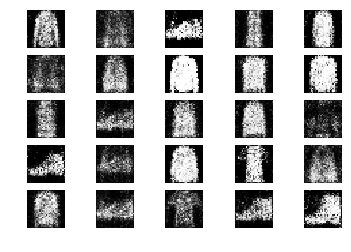

2051 [D loss: 0.605842, acc.: 67.19%] [G loss: 0.982530]
2052 [D loss: 0.578125, acc.: 73.44%] [G loss: 0.976113]
2053 [D loss: 0.637492, acc.: 59.38%] [G loss: 0.991769]
2054 [D loss: 0.641746, acc.: 59.38%] [G loss: 0.918831]
2055 [D loss: 0.576650, acc.: 76.56%] [G loss: 0.998504]
2056 [D loss: 0.705024, acc.: 56.25%] [G loss: 1.028687]
2057 [D loss: 0.606728, acc.: 67.19%] [G loss: 0.974572]
2058 [D loss: 0.603945, acc.: 64.06%] [G loss: 0.947270]
2059 [D loss: 0.668665, acc.: 54.69%] [G loss: 1.013440]
2060 [D loss: 0.565950, acc.: 75.00%] [G loss: 1.061700]
2061 [D loss: 0.607345, acc.: 67.19%] [G loss: 0.900158]
2062 [D loss: 0.624241, acc.: 71.88%] [G loss: 1.064972]
2063 [D loss: 0.571789, acc.: 78.12%] [G loss: 1.077165]
2064 [D loss: 0.578425, acc.: 71.88%] [G loss: 1.011106]
2065 [D loss: 0.589667, acc.: 71.88%] [G loss: 0.983716]
2066 [D loss: 0.668157, acc.: 67.19%] [G loss: 0.978577]
2067 [D loss: 0.651576, acc.: 64.06%] [G loss: 1.057370]
2068 [D loss: 0.673462, acc.: 5

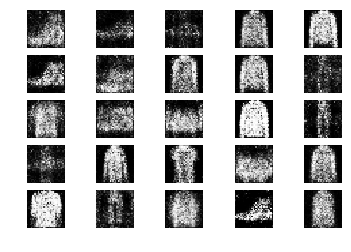

2101 [D loss: 0.647120, acc.: 56.25%] [G loss: 0.974208]
2102 [D loss: 0.554011, acc.: 71.88%] [G loss: 0.898386]
2103 [D loss: 0.636921, acc.: 60.94%] [G loss: 0.866166]
2104 [D loss: 0.659772, acc.: 60.94%] [G loss: 0.866190]
2105 [D loss: 0.621670, acc.: 67.19%] [G loss: 0.958309]
2106 [D loss: 0.590133, acc.: 67.19%] [G loss: 0.855792]
2107 [D loss: 0.580638, acc.: 70.31%] [G loss: 0.863229]
2108 [D loss: 0.589142, acc.: 65.62%] [G loss: 0.928777]
2109 [D loss: 0.659258, acc.: 60.94%] [G loss: 0.974633]
2110 [D loss: 0.585004, acc.: 67.19%] [G loss: 0.929034]
2111 [D loss: 0.610981, acc.: 71.88%] [G loss: 0.995131]
2112 [D loss: 0.650322, acc.: 64.06%] [G loss: 1.020816]
2113 [D loss: 0.638941, acc.: 64.06%] [G loss: 1.008631]
2114 [D loss: 0.565866, acc.: 71.88%] [G loss: 1.012573]
2115 [D loss: 0.611467, acc.: 65.62%] [G loss: 1.013062]
2116 [D loss: 0.587666, acc.: 64.06%] [G loss: 0.956237]
2117 [D loss: 0.632175, acc.: 64.06%] [G loss: 0.963397]
2118 [D loss: 0.636929, acc.: 7

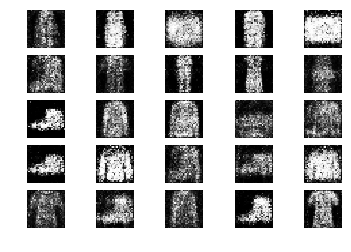

2151 [D loss: 0.692610, acc.: 59.38%] [G loss: 0.950248]
2152 [D loss: 0.623758, acc.: 70.31%] [G loss: 0.951136]
2153 [D loss: 0.607474, acc.: 65.62%] [G loss: 0.963995]
2154 [D loss: 0.561310, acc.: 76.56%] [G loss: 0.939958]
2155 [D loss: 0.606660, acc.: 68.75%] [G loss: 0.943814]
2156 [D loss: 0.579710, acc.: 78.12%] [G loss: 0.914163]
2157 [D loss: 0.579785, acc.: 70.31%] [G loss: 0.902334]
2158 [D loss: 0.638068, acc.: 60.94%] [G loss: 0.911292]
2159 [D loss: 0.626504, acc.: 62.50%] [G loss: 0.895921]
2160 [D loss: 0.638124, acc.: 59.38%] [G loss: 0.970343]
2161 [D loss: 0.611468, acc.: 64.06%] [G loss: 0.937659]
2162 [D loss: 0.676713, acc.: 57.81%] [G loss: 0.947862]
2163 [D loss: 0.647954, acc.: 62.50%] [G loss: 0.977476]
2164 [D loss: 0.551880, acc.: 75.00%] [G loss: 0.837814]
2165 [D loss: 0.626401, acc.: 71.88%] [G loss: 1.006322]
2166 [D loss: 0.581918, acc.: 73.44%] [G loss: 0.845317]
2167 [D loss: 0.588552, acc.: 71.88%] [G loss: 0.916648]
2168 [D loss: 0.560199, acc.: 7

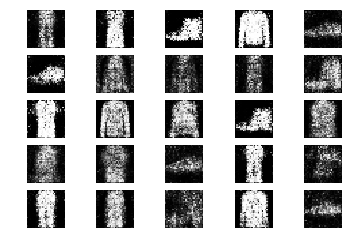

2201 [D loss: 0.590768, acc.: 73.44%] [G loss: 1.069469]
2202 [D loss: 0.626582, acc.: 65.62%] [G loss: 1.025887]
2203 [D loss: 0.605169, acc.: 64.06%] [G loss: 1.023350]
2204 [D loss: 0.582944, acc.: 67.19%] [G loss: 0.963288]
2205 [D loss: 0.594075, acc.: 71.88%] [G loss: 0.999066]
2206 [D loss: 0.575812, acc.: 75.00%] [G loss: 0.968954]
2207 [D loss: 0.655273, acc.: 59.38%] [G loss: 0.915057]
2208 [D loss: 0.621559, acc.: 65.62%] [G loss: 0.996659]
2209 [D loss: 0.634137, acc.: 62.50%] [G loss: 0.921738]
2210 [D loss: 0.649680, acc.: 60.94%] [G loss: 0.990783]
2211 [D loss: 0.579042, acc.: 71.88%] [G loss: 0.968774]
2212 [D loss: 0.549520, acc.: 76.56%] [G loss: 1.002016]
2213 [D loss: 0.622688, acc.: 67.19%] [G loss: 1.013691]
2214 [D loss: 0.540289, acc.: 78.12%] [G loss: 0.894268]
2215 [D loss: 0.612085, acc.: 62.50%] [G loss: 0.927783]
2216 [D loss: 0.622755, acc.: 68.75%] [G loss: 1.098425]
2217 [D loss: 0.606787, acc.: 68.75%] [G loss: 0.965601]
2218 [D loss: 0.636873, acc.: 6

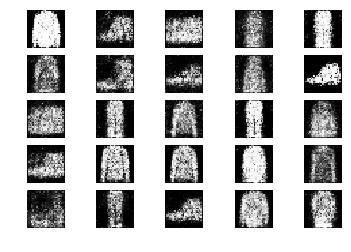

2251 [D loss: 0.568132, acc.: 68.75%] [G loss: 0.981753]
2252 [D loss: 0.621894, acc.: 67.19%] [G loss: 0.938221]
2253 [D loss: 0.590904, acc.: 67.19%] [G loss: 0.976310]
2254 [D loss: 0.704061, acc.: 59.38%] [G loss: 0.924649]
2255 [D loss: 0.603955, acc.: 70.31%] [G loss: 0.931206]
2256 [D loss: 0.609628, acc.: 64.06%] [G loss: 0.956933]
2257 [D loss: 0.618318, acc.: 68.75%] [G loss: 0.988337]
2258 [D loss: 0.598773, acc.: 75.00%] [G loss: 0.955804]
2259 [D loss: 0.604245, acc.: 68.75%] [G loss: 0.975853]
2260 [D loss: 0.598781, acc.: 62.50%] [G loss: 0.988967]
2261 [D loss: 0.605514, acc.: 65.62%] [G loss: 0.927823]
2262 [D loss: 0.566823, acc.: 71.88%] [G loss: 0.950961]
2263 [D loss: 0.539658, acc.: 73.44%] [G loss: 1.014628]
2264 [D loss: 0.578849, acc.: 71.88%] [G loss: 1.027051]
2265 [D loss: 0.695553, acc.: 50.00%] [G loss: 0.874501]
2266 [D loss: 0.603139, acc.: 64.06%] [G loss: 0.945563]
2267 [D loss: 0.647592, acc.: 57.81%] [G loss: 0.874164]
2268 [D loss: 0.571670, acc.: 7

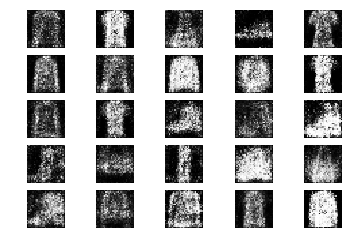

2301 [D loss: 0.639262, acc.: 59.38%] [G loss: 0.942921]
2302 [D loss: 0.610586, acc.: 59.38%] [G loss: 1.171978]
2303 [D loss: 0.609471, acc.: 62.50%] [G loss: 1.062578]
2304 [D loss: 0.582623, acc.: 75.00%] [G loss: 0.868545]
2305 [D loss: 0.708584, acc.: 53.12%] [G loss: 0.876247]
2306 [D loss: 0.600350, acc.: 64.06%] [G loss: 1.022679]
2307 [D loss: 0.661367, acc.: 62.50%] [G loss: 0.920690]
2308 [D loss: 0.607742, acc.: 70.31%] [G loss: 0.989970]
2309 [D loss: 0.672111, acc.: 62.50%] [G loss: 1.069373]
2310 [D loss: 0.588289, acc.: 64.06%] [G loss: 1.047995]
2311 [D loss: 0.647955, acc.: 67.19%] [G loss: 0.987551]
2312 [D loss: 0.630408, acc.: 60.94%] [G loss: 1.048531]
2313 [D loss: 0.564678, acc.: 70.31%] [G loss: 1.027749]
2314 [D loss: 0.663474, acc.: 62.50%] [G loss: 0.928890]
2315 [D loss: 0.600962, acc.: 68.75%] [G loss: 0.869034]
2316 [D loss: 0.586442, acc.: 71.88%] [G loss: 0.898023]
2317 [D loss: 0.652191, acc.: 54.69%] [G loss: 0.996394]
2318 [D loss: 0.603841, acc.: 7

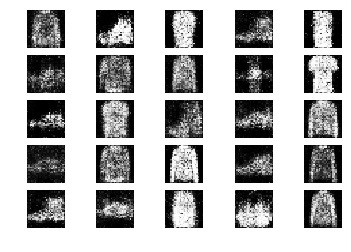

2351 [D loss: 0.669842, acc.: 57.81%] [G loss: 0.901607]
2352 [D loss: 0.597556, acc.: 71.88%] [G loss: 0.887924]
2353 [D loss: 0.687245, acc.: 53.12%] [G loss: 0.886141]
2354 [D loss: 0.570662, acc.: 60.94%] [G loss: 0.915473]
2355 [D loss: 0.655674, acc.: 64.06%] [G loss: 1.047540]
2356 [D loss: 0.616021, acc.: 68.75%] [G loss: 1.004934]
2357 [D loss: 0.609801, acc.: 65.62%] [G loss: 0.922944]
2358 [D loss: 0.652777, acc.: 65.62%] [G loss: 0.932266]
2359 [D loss: 0.586477, acc.: 68.75%] [G loss: 0.934255]
2360 [D loss: 0.556937, acc.: 75.00%] [G loss: 0.941767]
2361 [D loss: 0.623044, acc.: 62.50%] [G loss: 0.940030]
2362 [D loss: 0.623015, acc.: 65.62%] [G loss: 0.954612]
2363 [D loss: 0.645233, acc.: 64.06%] [G loss: 0.920663]
2364 [D loss: 0.619223, acc.: 60.94%] [G loss: 1.062012]
2365 [D loss: 0.580294, acc.: 73.44%] [G loss: 1.059584]
2366 [D loss: 0.582793, acc.: 65.62%] [G loss: 0.943648]
2367 [D loss: 0.673865, acc.: 73.44%] [G loss: 0.944070]
2368 [D loss: 0.633478, acc.: 6

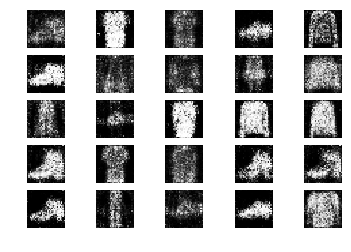

2401 [D loss: 0.614960, acc.: 68.75%] [G loss: 1.014784]
2402 [D loss: 0.619036, acc.: 64.06%] [G loss: 0.952798]
2403 [D loss: 0.577209, acc.: 78.12%] [G loss: 0.992262]
2404 [D loss: 0.610343, acc.: 68.75%] [G loss: 0.978942]
2405 [D loss: 0.596119, acc.: 70.31%] [G loss: 0.947995]
2406 [D loss: 0.586234, acc.: 70.31%] [G loss: 0.953643]
2407 [D loss: 0.636126, acc.: 68.75%] [G loss: 0.880046]
2408 [D loss: 0.633381, acc.: 65.62%] [G loss: 0.953100]
2409 [D loss: 0.603156, acc.: 67.19%] [G loss: 0.924257]
2410 [D loss: 0.656360, acc.: 65.62%] [G loss: 1.048180]
2411 [D loss: 0.567977, acc.: 71.88%] [G loss: 0.995870]
2412 [D loss: 0.573790, acc.: 71.88%] [G loss: 0.904191]
2413 [D loss: 0.579158, acc.: 60.94%] [G loss: 0.977337]
2414 [D loss: 0.740475, acc.: 56.25%] [G loss: 1.078164]
2415 [D loss: 0.600676, acc.: 67.19%] [G loss: 1.023351]
2416 [D loss: 0.647979, acc.: 60.94%] [G loss: 1.038923]
2417 [D loss: 0.624289, acc.: 64.06%] [G loss: 0.961801]
2418 [D loss: 0.596001, acc.: 7

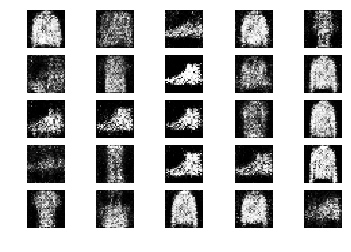

2451 [D loss: 0.545887, acc.: 76.56%] [G loss: 0.917407]
2452 [D loss: 0.598784, acc.: 65.62%] [G loss: 0.948192]
2453 [D loss: 0.573946, acc.: 75.00%] [G loss: 0.944942]
2454 [D loss: 0.645814, acc.: 57.81%] [G loss: 0.987413]
2455 [D loss: 0.591749, acc.: 67.19%] [G loss: 1.024096]
2456 [D loss: 0.634876, acc.: 56.25%] [G loss: 1.069794]
2457 [D loss: 0.642155, acc.: 64.06%] [G loss: 0.958553]
2458 [D loss: 0.608769, acc.: 67.19%] [G loss: 0.999844]
2459 [D loss: 0.581439, acc.: 76.56%] [G loss: 0.924572]
2460 [D loss: 0.631866, acc.: 67.19%] [G loss: 0.957887]
2461 [D loss: 0.590117, acc.: 65.62%] [G loss: 0.949192]
2462 [D loss: 0.648108, acc.: 62.50%] [G loss: 1.025455]
2463 [D loss: 0.671145, acc.: 67.19%] [G loss: 1.038769]
2464 [D loss: 0.565828, acc.: 76.56%] [G loss: 0.990538]
2465 [D loss: 0.673653, acc.: 60.94%] [G loss: 1.067077]
2466 [D loss: 0.563806, acc.: 75.00%] [G loss: 1.054538]
2467 [D loss: 0.724127, acc.: 57.81%] [G loss: 1.084119]
2468 [D loss: 0.630636, acc.: 6

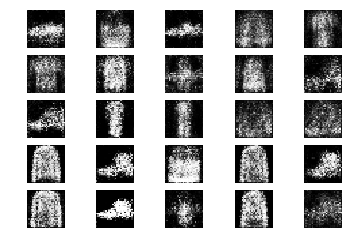

2501 [D loss: 0.640477, acc.: 62.50%] [G loss: 0.900158]
2502 [D loss: 0.602149, acc.: 73.44%] [G loss: 0.898878]
2503 [D loss: 0.620958, acc.: 64.06%] [G loss: 1.039938]
2504 [D loss: 0.558641, acc.: 75.00%] [G loss: 0.959624]
2505 [D loss: 0.578432, acc.: 70.31%] [G loss: 1.052580]
2506 [D loss: 0.606837, acc.: 57.81%] [G loss: 0.992096]
2507 [D loss: 0.594547, acc.: 73.44%] [G loss: 1.001953]
2508 [D loss: 0.597166, acc.: 68.75%] [G loss: 0.946648]
2509 [D loss: 0.592387, acc.: 70.31%] [G loss: 1.088707]
2510 [D loss: 0.628594, acc.: 70.31%] [G loss: 1.051084]
2511 [D loss: 0.690783, acc.: 56.25%] [G loss: 1.032476]
2512 [D loss: 0.645446, acc.: 67.19%] [G loss: 0.914363]
2513 [D loss: 0.552115, acc.: 76.56%] [G loss: 0.919935]
2514 [D loss: 0.562947, acc.: 71.88%] [G loss: 1.001872]
2515 [D loss: 0.644402, acc.: 62.50%] [G loss: 0.970331]
2516 [D loss: 0.640970, acc.: 65.62%] [G loss: 1.033628]
2517 [D loss: 0.667460, acc.: 60.94%] [G loss: 0.868078]
2518 [D loss: 0.613661, acc.: 6

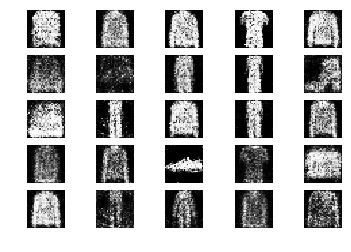

2551 [D loss: 0.620723, acc.: 67.19%] [G loss: 1.061384]
2552 [D loss: 0.622074, acc.: 64.06%] [G loss: 1.017087]
2553 [D loss: 0.672141, acc.: 65.62%] [G loss: 1.052589]
2554 [D loss: 0.654637, acc.: 65.62%] [G loss: 0.942639]
2555 [D loss: 0.682003, acc.: 56.25%] [G loss: 0.961653]
2556 [D loss: 0.589899, acc.: 70.31%] [G loss: 0.971132]
2557 [D loss: 0.645203, acc.: 67.19%] [G loss: 0.965648]
2558 [D loss: 0.595188, acc.: 78.12%] [G loss: 0.992659]
2559 [D loss: 0.600121, acc.: 62.50%] [G loss: 1.048751]
2560 [D loss: 0.626121, acc.: 64.06%] [G loss: 1.038587]
2561 [D loss: 0.643453, acc.: 65.62%] [G loss: 0.915372]
2562 [D loss: 0.596875, acc.: 71.88%] [G loss: 1.040241]
2563 [D loss: 0.621140, acc.: 56.25%] [G loss: 0.934789]
2564 [D loss: 0.561934, acc.: 76.56%] [G loss: 0.993412]
2565 [D loss: 0.585344, acc.: 71.88%] [G loss: 0.948410]
2566 [D loss: 0.580491, acc.: 71.88%] [G loss: 0.997552]
2567 [D loss: 0.632790, acc.: 62.50%] [G loss: 0.910659]
2568 [D loss: 0.623428, acc.: 6

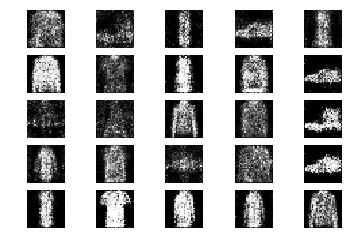

2601 [D loss: 0.609393, acc.: 57.81%] [G loss: 0.994238]
2602 [D loss: 0.588078, acc.: 64.06%] [G loss: 1.091063]
2603 [D loss: 0.673484, acc.: 59.38%] [G loss: 0.942064]
2604 [D loss: 0.535568, acc.: 70.31%] [G loss: 1.057622]
2605 [D loss: 0.526914, acc.: 78.12%] [G loss: 1.070106]
2606 [D loss: 0.691590, acc.: 57.81%] [G loss: 0.911308]
2607 [D loss: 0.716242, acc.: 57.81%] [G loss: 0.793480]
2608 [D loss: 0.689149, acc.: 54.69%] [G loss: 0.845892]
2609 [D loss: 0.611933, acc.: 62.50%] [G loss: 0.957499]
2610 [D loss: 0.611797, acc.: 64.06%] [G loss: 1.096512]
2611 [D loss: 0.650695, acc.: 62.50%] [G loss: 0.903836]
2612 [D loss: 0.733059, acc.: 53.12%] [G loss: 0.946909]
2613 [D loss: 0.634301, acc.: 67.19%] [G loss: 0.957518]
2614 [D loss: 0.548420, acc.: 78.12%] [G loss: 1.005359]
2615 [D loss: 0.585052, acc.: 71.88%] [G loss: 0.922359]
2616 [D loss: 0.619504, acc.: 57.81%] [G loss: 0.913435]
2617 [D loss: 0.634734, acc.: 67.19%] [G loss: 0.971163]
2618 [D loss: 0.652871, acc.: 6

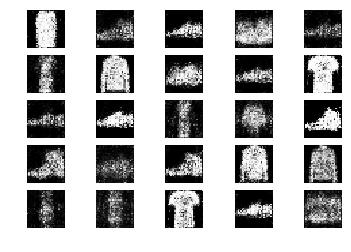

2651 [D loss: 0.658426, acc.: 60.94%] [G loss: 0.923776]
2652 [D loss: 0.585803, acc.: 71.88%] [G loss: 0.858462]
2653 [D loss: 0.532822, acc.: 81.25%] [G loss: 0.903628]
2654 [D loss: 0.671832, acc.: 59.38%] [G loss: 0.964567]
2655 [D loss: 0.577058, acc.: 71.88%] [G loss: 0.990567]
2656 [D loss: 0.614501, acc.: 68.75%] [G loss: 0.917746]
2657 [D loss: 0.617263, acc.: 65.62%] [G loss: 0.978741]
2658 [D loss: 0.673599, acc.: 50.00%] [G loss: 0.817312]
2659 [D loss: 0.655309, acc.: 59.38%] [G loss: 0.983218]
2660 [D loss: 0.546637, acc.: 75.00%] [G loss: 1.157794]
2661 [D loss: 0.680140, acc.: 57.81%] [G loss: 1.019524]
2662 [D loss: 0.651236, acc.: 62.50%] [G loss: 0.959670]
2663 [D loss: 0.613905, acc.: 68.75%] [G loss: 0.916922]
2664 [D loss: 0.572650, acc.: 70.31%] [G loss: 0.895446]
2665 [D loss: 0.643409, acc.: 70.31%] [G loss: 0.906186]
2666 [D loss: 0.611875, acc.: 64.06%] [G loss: 0.876807]
2667 [D loss: 0.686783, acc.: 53.12%] [G loss: 0.985449]
2668 [D loss: 0.690598, acc.: 5

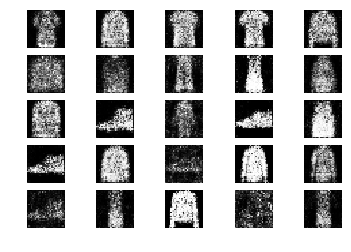

2701 [D loss: 0.663426, acc.: 64.06%] [G loss: 1.027591]
2702 [D loss: 0.680133, acc.: 59.38%] [G loss: 0.925361]
2703 [D loss: 0.649821, acc.: 51.56%] [G loss: 0.941678]
2704 [D loss: 0.633618, acc.: 60.94%] [G loss: 0.948081]
2705 [D loss: 0.610073, acc.: 65.62%] [G loss: 0.916792]
2706 [D loss: 0.632076, acc.: 65.62%] [G loss: 0.978558]
2707 [D loss: 0.548853, acc.: 75.00%] [G loss: 0.995840]
2708 [D loss: 0.618264, acc.: 60.94%] [G loss: 1.015014]
2709 [D loss: 0.582720, acc.: 65.62%] [G loss: 0.884353]
2710 [D loss: 0.673348, acc.: 59.38%] [G loss: 0.882332]
2711 [D loss: 0.577606, acc.: 64.06%] [G loss: 0.936334]
2712 [D loss: 0.625105, acc.: 71.88%] [G loss: 0.954110]
2713 [D loss: 0.627021, acc.: 67.19%] [G loss: 0.909323]
2714 [D loss: 0.583785, acc.: 67.19%] [G loss: 1.028155]
2715 [D loss: 0.632749, acc.: 65.62%] [G loss: 1.017034]
2716 [D loss: 0.549687, acc.: 73.44%] [G loss: 1.004264]
2717 [D loss: 0.618370, acc.: 75.00%] [G loss: 0.963661]
2718 [D loss: 0.628808, acc.: 6

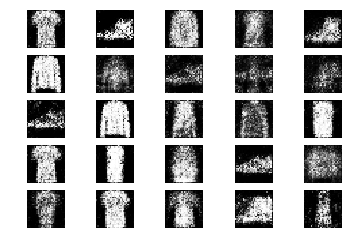

2751 [D loss: 0.609519, acc.: 65.62%] [G loss: 0.999352]
2752 [D loss: 0.576042, acc.: 64.06%] [G loss: 0.821041]
2753 [D loss: 0.661670, acc.: 57.81%] [G loss: 0.980099]
2754 [D loss: 0.649417, acc.: 60.94%] [G loss: 0.966697]
2755 [D loss: 0.648712, acc.: 59.38%] [G loss: 0.901007]
2756 [D loss: 0.596040, acc.: 65.62%] [G loss: 0.959650]
2757 [D loss: 0.629243, acc.: 68.75%] [G loss: 0.930359]
2758 [D loss: 0.601844, acc.: 65.62%] [G loss: 1.005372]
2759 [D loss: 0.556431, acc.: 73.44%] [G loss: 0.846099]
2760 [D loss: 0.580692, acc.: 67.19%] [G loss: 0.984930]
2761 [D loss: 0.667316, acc.: 59.38%] [G loss: 0.953847]
2762 [D loss: 0.621818, acc.: 57.81%] [G loss: 1.052374]
2763 [D loss: 0.563205, acc.: 75.00%] [G loss: 1.000207]
2764 [D loss: 0.644709, acc.: 59.38%] [G loss: 0.970817]
2765 [D loss: 0.562905, acc.: 73.44%] [G loss: 0.961176]
2766 [D loss: 0.622136, acc.: 70.31%] [G loss: 1.002955]
2767 [D loss: 0.658811, acc.: 57.81%] [G loss: 0.936414]
2768 [D loss: 0.649488, acc.: 6

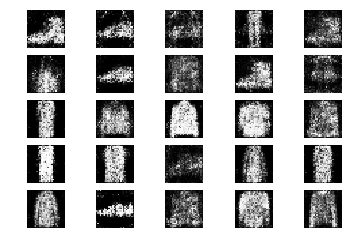

2801 [D loss: 0.671052, acc.: 60.94%] [G loss: 0.870716]
2802 [D loss: 0.569319, acc.: 65.62%] [G loss: 0.989686]
2803 [D loss: 0.596498, acc.: 65.62%] [G loss: 0.919712]
2804 [D loss: 0.580478, acc.: 64.06%] [G loss: 0.933809]
2805 [D loss: 0.604277, acc.: 73.44%] [G loss: 1.048028]
2806 [D loss: 0.630938, acc.: 64.06%] [G loss: 1.001843]
2807 [D loss: 0.595235, acc.: 78.12%] [G loss: 0.989629]
2808 [D loss: 0.635433, acc.: 64.06%] [G loss: 0.949462]
2809 [D loss: 0.591861, acc.: 71.88%] [G loss: 0.913465]
2810 [D loss: 0.585318, acc.: 67.19%] [G loss: 0.966496]
2811 [D loss: 0.722108, acc.: 56.25%] [G loss: 0.951396]
2812 [D loss: 0.534220, acc.: 70.31%] [G loss: 0.957490]
2813 [D loss: 0.685189, acc.: 51.56%] [G loss: 0.910366]
2814 [D loss: 0.609885, acc.: 65.62%] [G loss: 1.065602]
2815 [D loss: 0.631491, acc.: 59.38%] [G loss: 0.946014]
2816 [D loss: 0.666158, acc.: 62.50%] [G loss: 0.888923]
2817 [D loss: 0.614854, acc.: 68.75%] [G loss: 0.923037]
2818 [D loss: 0.605026, acc.: 6

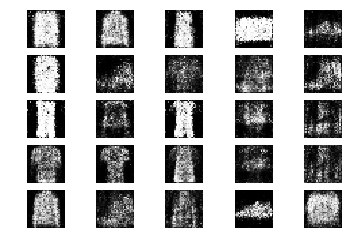

2851 [D loss: 0.569062, acc.: 70.31%] [G loss: 0.884355]
2852 [D loss: 0.556201, acc.: 68.75%] [G loss: 0.963206]
2853 [D loss: 0.656023, acc.: 57.81%] [G loss: 0.932660]
2854 [D loss: 0.580945, acc.: 67.19%] [G loss: 1.000890]
2855 [D loss: 0.588418, acc.: 67.19%] [G loss: 1.046989]
2856 [D loss: 0.707198, acc.: 60.94%] [G loss: 0.943016]
2857 [D loss: 0.642543, acc.: 65.62%] [G loss: 0.959620]
2858 [D loss: 0.533592, acc.: 79.69%] [G loss: 0.970316]
2859 [D loss: 0.676483, acc.: 54.69%] [G loss: 1.045068]
2860 [D loss: 0.617335, acc.: 67.19%] [G loss: 0.912760]
2861 [D loss: 0.571314, acc.: 73.44%] [G loss: 1.025609]
2862 [D loss: 0.590711, acc.: 73.44%] [G loss: 0.976763]
2863 [D loss: 0.607348, acc.: 67.19%] [G loss: 0.936810]
2864 [D loss: 0.660370, acc.: 56.25%] [G loss: 0.946576]
2865 [D loss: 0.678867, acc.: 59.38%] [G loss: 0.961813]
2866 [D loss: 0.574612, acc.: 70.31%] [G loss: 0.961405]
2867 [D loss: 0.581591, acc.: 65.62%] [G loss: 1.131668]
2868 [D loss: 0.610836, acc.: 7

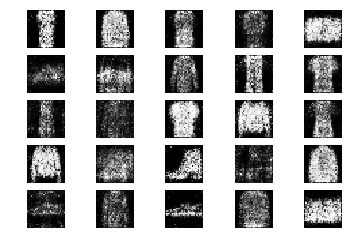

2901 [D loss: 0.598516, acc.: 59.38%] [G loss: 0.965277]
2902 [D loss: 0.671694, acc.: 53.12%] [G loss: 1.086155]
2903 [D loss: 0.631946, acc.: 62.50%] [G loss: 0.955330]
2904 [D loss: 0.631555, acc.: 68.75%] [G loss: 0.985597]
2905 [D loss: 0.656685, acc.: 65.62%] [G loss: 0.947861]
2906 [D loss: 0.592204, acc.: 75.00%] [G loss: 0.879593]
2907 [D loss: 0.609294, acc.: 65.62%] [G loss: 1.072634]
2908 [D loss: 0.591404, acc.: 75.00%] [G loss: 0.981144]
2909 [D loss: 0.644580, acc.: 57.81%] [G loss: 0.984614]
2910 [D loss: 0.607173, acc.: 67.19%] [G loss: 1.017950]
2911 [D loss: 0.587559, acc.: 71.88%] [G loss: 0.953973]
2912 [D loss: 0.547061, acc.: 79.69%] [G loss: 1.096180]
2913 [D loss: 0.631880, acc.: 73.44%] [G loss: 1.013163]
2914 [D loss: 0.586777, acc.: 71.88%] [G loss: 1.024926]
2915 [D loss: 0.580935, acc.: 76.56%] [G loss: 0.965510]
2916 [D loss: 0.581254, acc.: 67.19%] [G loss: 0.907038]
2917 [D loss: 0.584383, acc.: 68.75%] [G loss: 0.921040]
2918 [D loss: 0.654925, acc.: 5

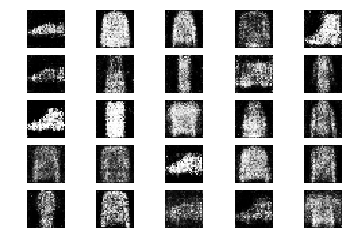

2951 [D loss: 0.567102, acc.: 71.88%] [G loss: 0.944841]
2952 [D loss: 0.709930, acc.: 59.38%] [G loss: 0.933580]
2953 [D loss: 0.662532, acc.: 59.38%] [G loss: 1.032351]
2954 [D loss: 0.609307, acc.: 64.06%] [G loss: 0.973440]
2955 [D loss: 0.635341, acc.: 67.19%] [G loss: 0.975073]
2956 [D loss: 0.646452, acc.: 51.56%] [G loss: 0.946673]
2957 [D loss: 0.625825, acc.: 67.19%] [G loss: 0.977840]
2958 [D loss: 0.623208, acc.: 59.38%] [G loss: 0.917737]
2959 [D loss: 0.737292, acc.: 45.31%] [G loss: 0.955805]
2960 [D loss: 0.632025, acc.: 68.75%] [G loss: 0.944421]
2961 [D loss: 0.585094, acc.: 70.31%] [G loss: 0.902919]
2962 [D loss: 0.622597, acc.: 67.19%] [G loss: 0.986776]
2963 [D loss: 0.656416, acc.: 57.81%] [G loss: 0.863029]
2964 [D loss: 0.629701, acc.: 70.31%] [G loss: 0.857327]
2965 [D loss: 0.604589, acc.: 67.19%] [G loss: 0.848937]
2966 [D loss: 0.598048, acc.: 68.75%] [G loss: 0.978489]
2967 [D loss: 0.590933, acc.: 70.31%] [G loss: 0.924509]
2968 [D loss: 0.650121, acc.: 6

In [57]:
epochs = 3000

batch_size = 32
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):
  # Train discriminator
  idx = np.random.randint(0, x_train.shape[0], batch_size)
  imgs = x_train[idx]

  noise = np.random.normal(0, 1, (batch_size, 100))

  gen_imgs = generator.predict(noise)

  d_loss_real = discriminator.train_on_batch(imgs, valid)
  d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
  d_loss = 0.5*np.add(d_loss_real, d_loss_fake)

  # Train generator
  noise = np.random.normal(0, 1, (batch_size, 100))

  g_loss = combined.train_on_batch(noise, valid)

  print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

  if epoch % 50 == 0:
    sample_images(epoch)

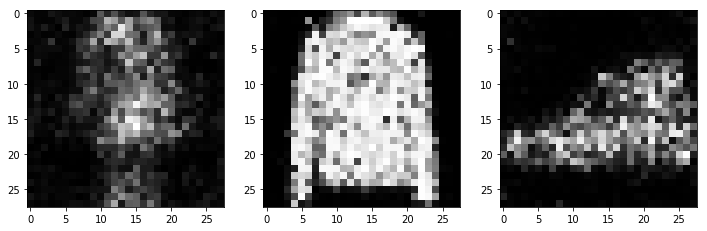

In [63]:
r, c = 5, 5
noise = np.random.normal(0, 1, (r*c, 100))
gen_imgs = generator.predict(noise)

gen_imgs = 0.5*gen_imgs+0.5

plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(gen_imgs[0, :, :, 0], cmap='gray')
plt.subplot(132)
plt.imshow(gen_imgs[1, :, :, 0], cmap='gray')
plt.subplot(133)
plt.imshow(gen_imgs[2, :, :, 0], cmap='gray')
plt.show()
plt.close()